In [1]:
try:
    from tools.utils import EnvironmentDirOptions
except:
    !wget --no-cache -O utils.py -q https://raw.githubusercontent.com/aclicona/Utils/main/MachineLearning/utils.py
    from utils import EnvironmentDirOptions

2024-06-06 19:04:41.524525: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 19:04:41.524644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 19:04:41.639851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
github_repo_path = "https://github.com/MoisesGuerreroUdeA/Monografia/archive/refs/heads/main-licona.zip"
repo_name = "Monografia"
env_token_key = "GITHUB_TOKEN"
env_dir_options = EnvironmentDirOptions()
env_dir_options.get_repo_from_git(github_repo_path, repo_name, env_token_key)
main_dir = env_dir_options.main_dir




Archive:  /kaggle/working/main-licona.zip
4a2c27bf884a9d4d9e6490642d1a819e99383733
   creating: /kaggle/working/Monografia-main-licona/
  inflating: /kaggle/working/Monografia-main-licona/.gitignore  
  inflating: /kaggle/working/Monografia-main-licona/1_Analisis_Exploratorio.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/2_Limpieza_Seleccion_Modelos.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/3_Preparacion_Datos.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/4_RNN.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/4_RNN_Andres.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/5_LSTM.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/6_GRU.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/7_ConvGRU.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/8_Lag-Llama.ipynb  
  inflating: /kaggle/working/Monografia-main-licona/Pipfile  
  inflating: /kaggle/working/Monografia-main-licona/Pipfile.lock  


In [4]:
import os
import pandas as pd
from keras import backend
import json

os.environ['LOG_LEVEL'] = 'INFO'
from tools.model_generation.generator import Generator
from tools.model_generation.trainer import Trainer
from tools.model_generation.evaluator import ModelEvaluator
from tools.utils import DataSelectionForEvaluator, load_scaler, save_scaler

In [5]:
dataset = pd.read_feather(os.path.join(main_dir, 'data', 'dataset.feather'))

In [6]:
json_config_path = os.path.join(main_dir, "config/config_models_LSTM.json")
file = open(json_config_path, 'r')
model_configurations = json.load(file)

model_generator = Generator()
trainer = Trainer()
model_save_dir = env_dir_options.save_dir_path("models/")

In [ ]:
for model_conf in model_configurations:
    backend.clear_session()
    model = model_generator.generate_model(model_conf)
    training_params, scaler_x, scaler_y = trainer.train_model_params(model_conf, dataset, model_save_dir)
    history = model.fit(**training_params)
    trainer.save_history(model.name, history.history, model_save_dir)
    save_scaler(scaler_x, f'{model_save_dir}/{model.name}_scaler_x.pkl')
    save_scaler(scaler_y, f'{model_save_dir}/{model.name}_scaler_y.pkl')

Model: "LSTM_1_look96_overlap1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 96, 200)        │       169,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 96, 150)        │       210,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 96, 125)        │       138,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96, 125)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100)            │        90,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,848 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 613,448 (2.34 MB)

 Trainable params: 613,448 (2.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
   1/3447 ━━━━━━━━━━━━━━━━━━━━ 14:33:04 15s/step - loss: 0.0042 - mae: 0.0450 - mse: 0.0085

I0000 00:00:1717696837.098344     274 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717696837.179984     274 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3447/3447 ━━━━━━━━━━━━━━━━━━━━ 189s 50ms/step - loss: 0.0070 - mae: 0.0789 - mse: 0.0140 - val_loss: 0.0104 - val_mae: 0.0950 - val_mse: 0.0208
Epoch 2/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 161s 47ms/step - loss: 0.0054 - mae: 0.0666 - mse: 0.0108 - val_loss: 0.0096 - val_mae: 0.0918 - val_mse: 0.0191
Epoch 3/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 162s 47ms/step - loss: 0.0052 - mae: 0.0657 - mse: 0.0103 - val_loss: 0.0088 - val_mae: 0.0901 - val_mse: 0.0176
Epoch 4/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 161s 47ms/step - loss: 0.0050 - mae: 0.0645 - mse: 0.0099 - val_loss: 0.0079 - val_mae: 0.0879 - val_mse: 0.0159
Epoch 5/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 161s 47ms/step - loss: 0.0046 - mae: 0.0618 - mse: 0.0092 - val_loss: 0.0072 - val_mae: 0.0839 - val_mse: 0.0143
Epoch 6/50
3447/3447 ━━━━━━━━━━━━━━━━━━━━ 162s 47ms/step - loss: 0.0044 - mae: 0.0596 - mse: 0.0087 - val_loss: 0.0070 - val_mae: 0.0824 - val_mse: 0.0140
Epoch 7/50
1984/3447 ━━━━━━━━━━━━━━━━━━━━ 1:02 43ms/step - loss: 0.0044 - mae: 0.

Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look48_overlap1_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look48_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


I0000 00:00:1717700769.207601     128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


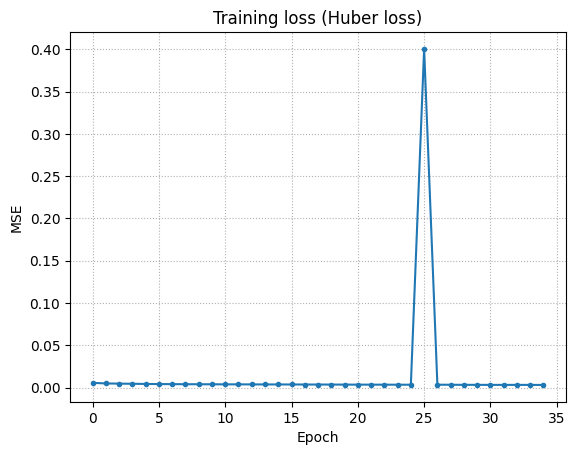

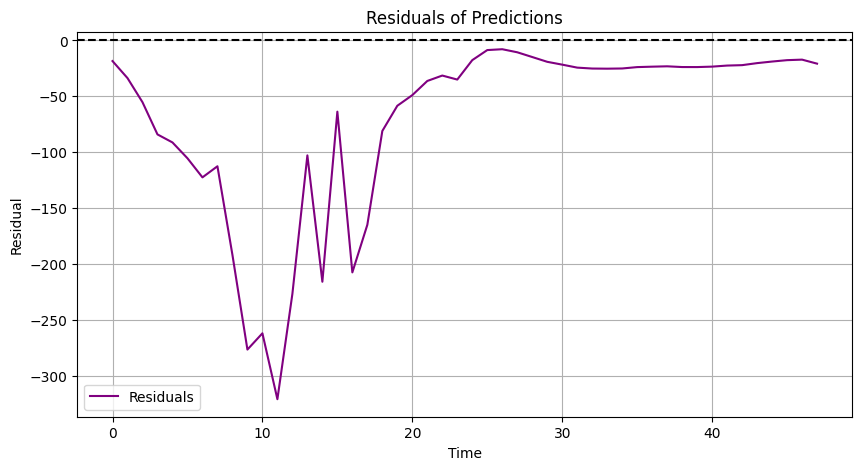

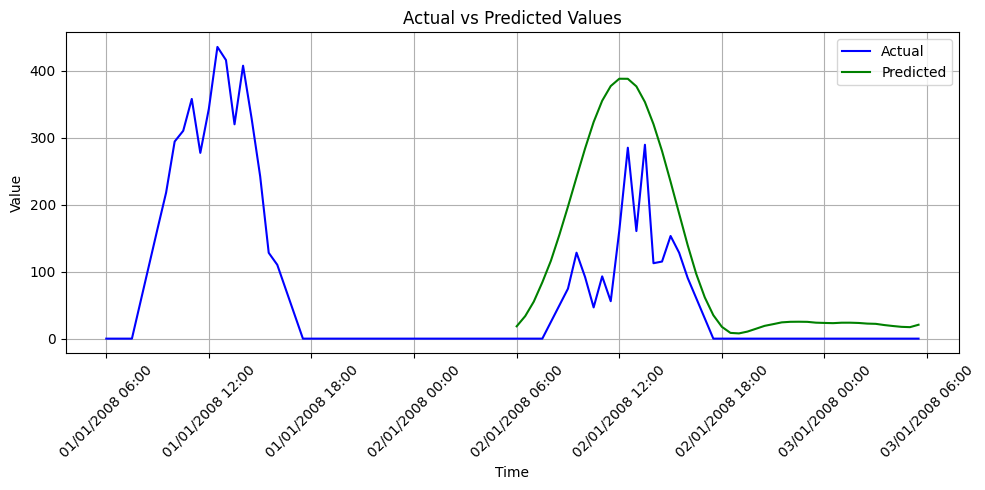

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


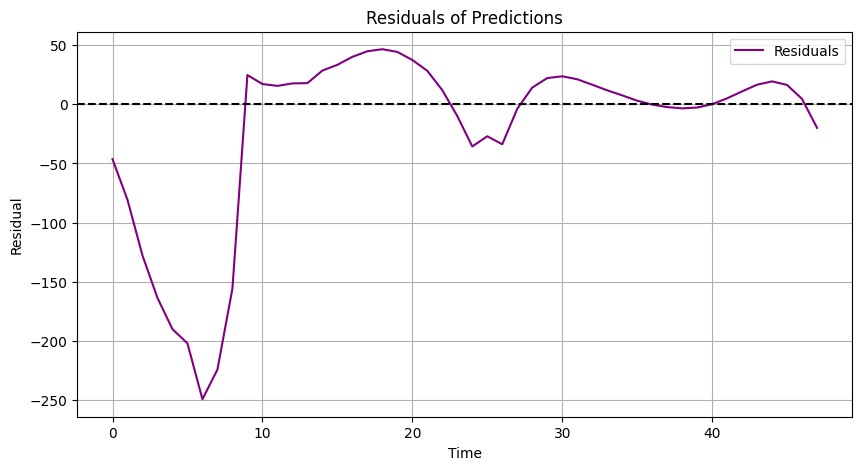

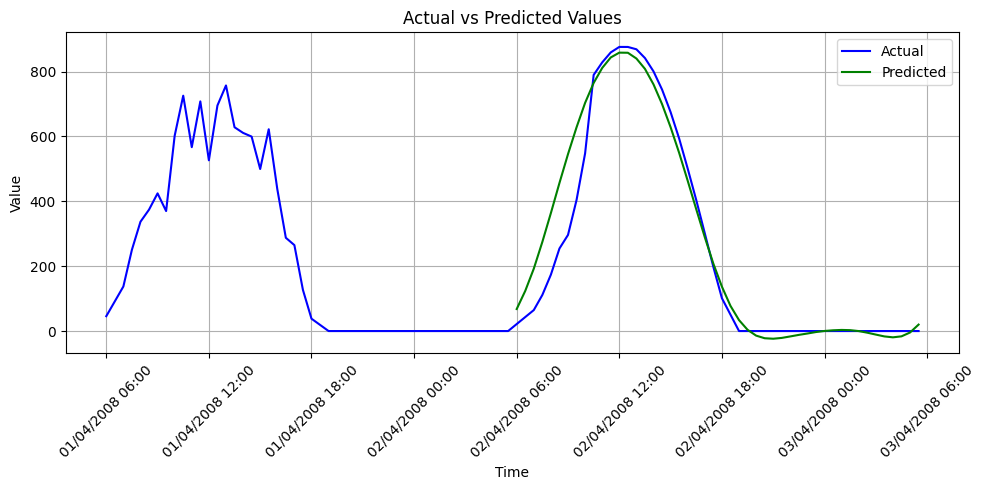

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


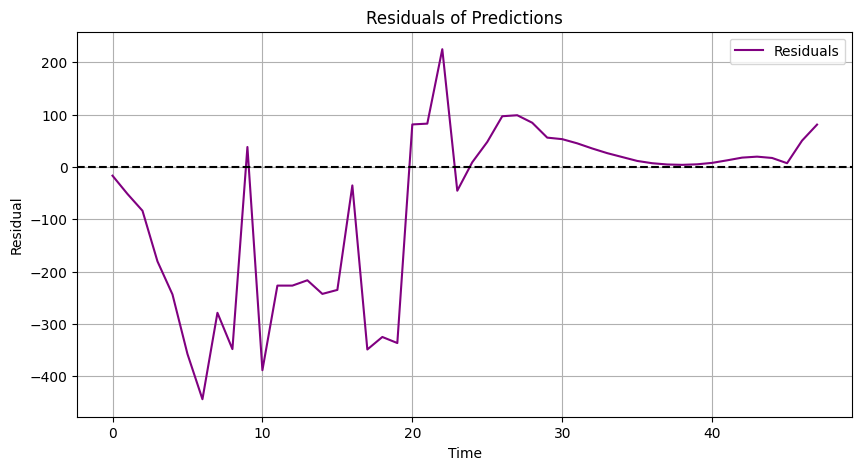

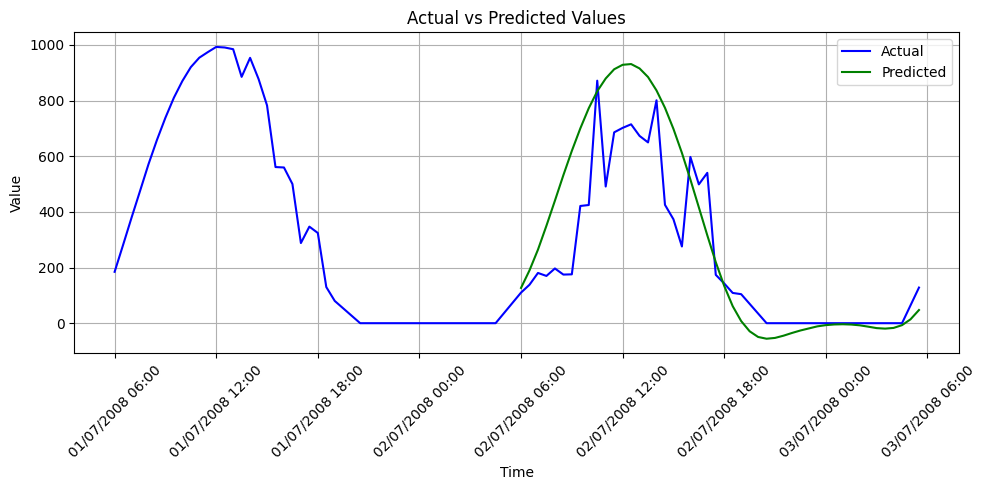

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


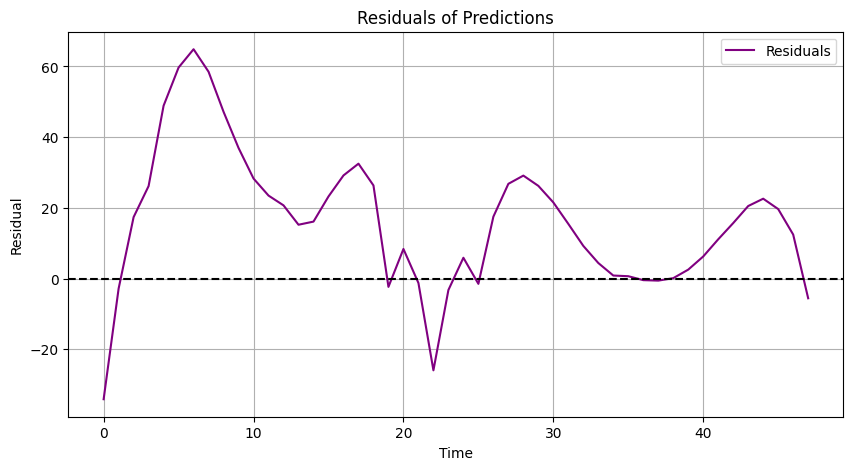

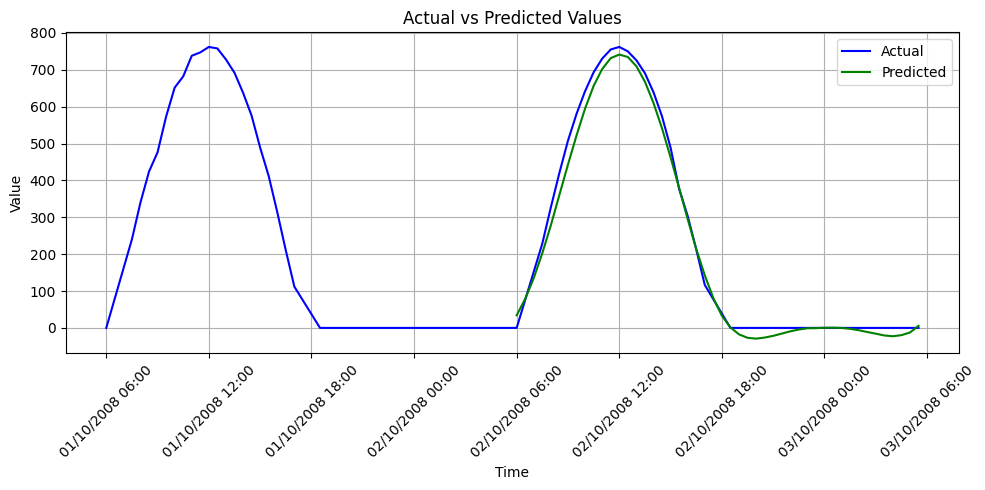

Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look72_overlap1_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look72_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


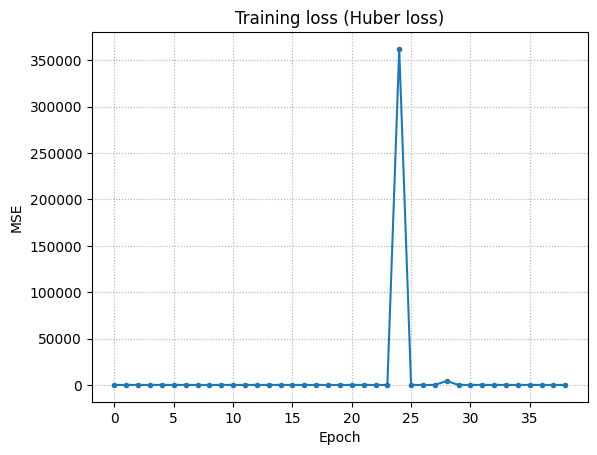

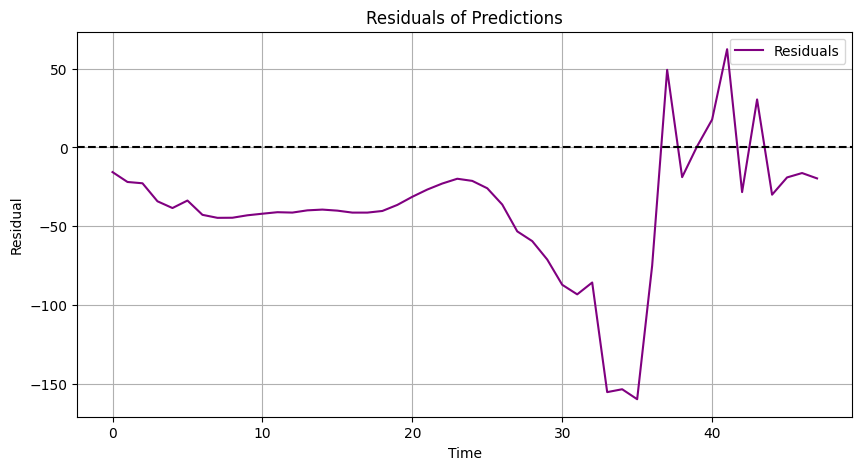

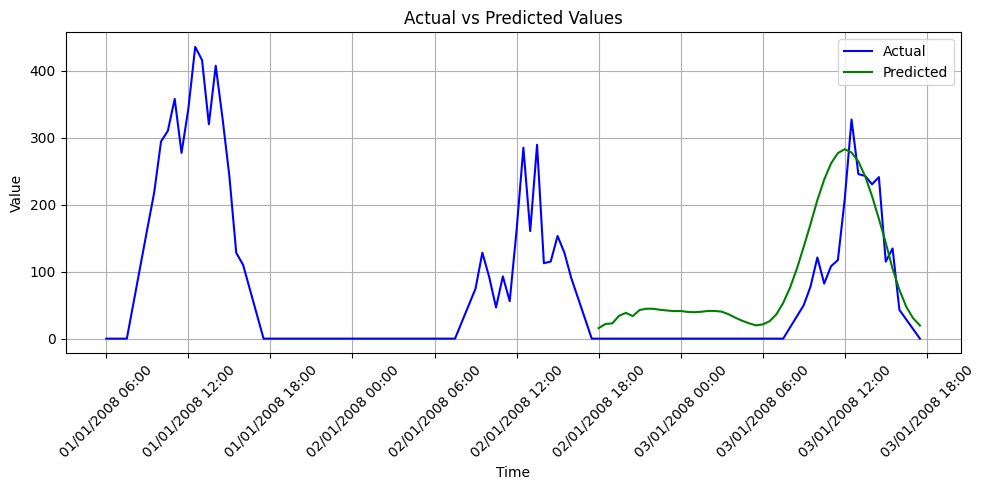

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


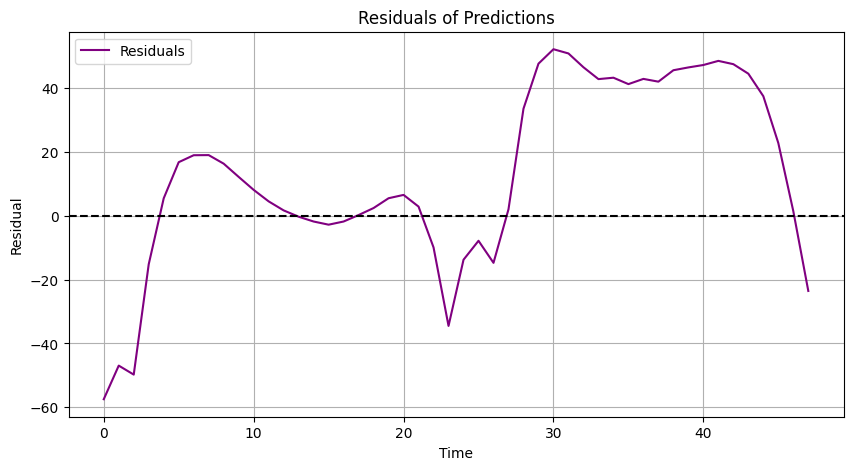

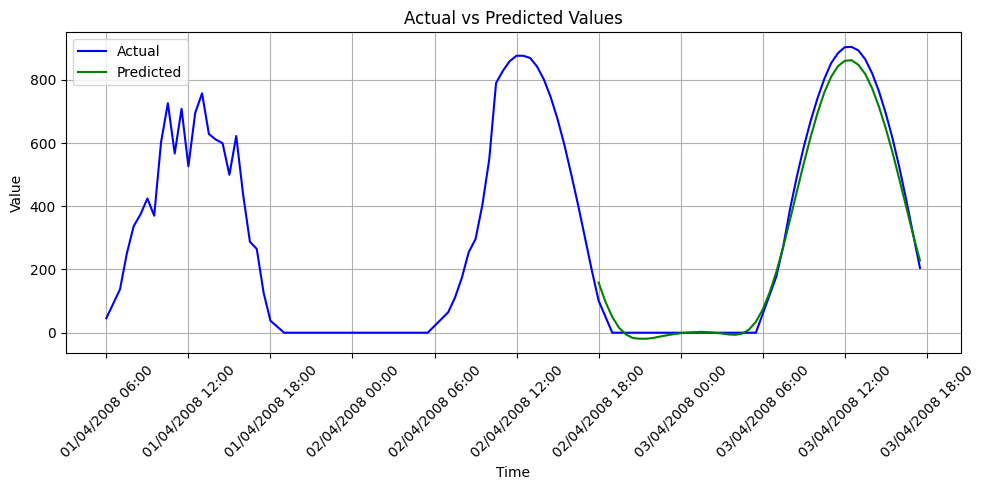

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


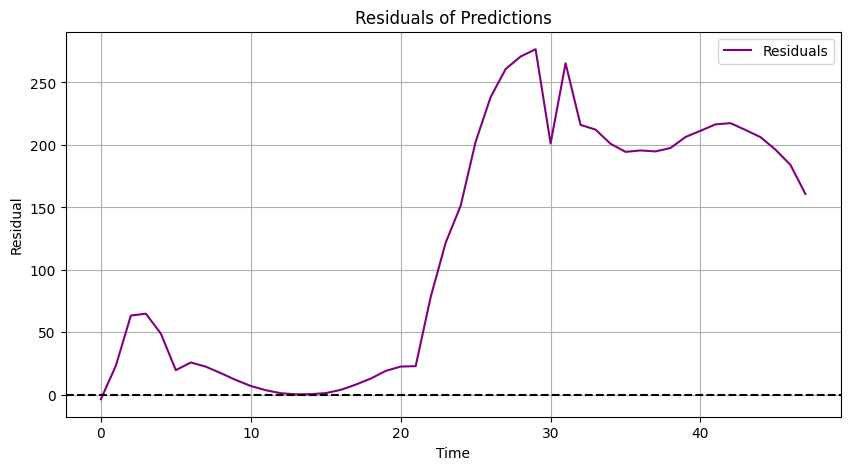

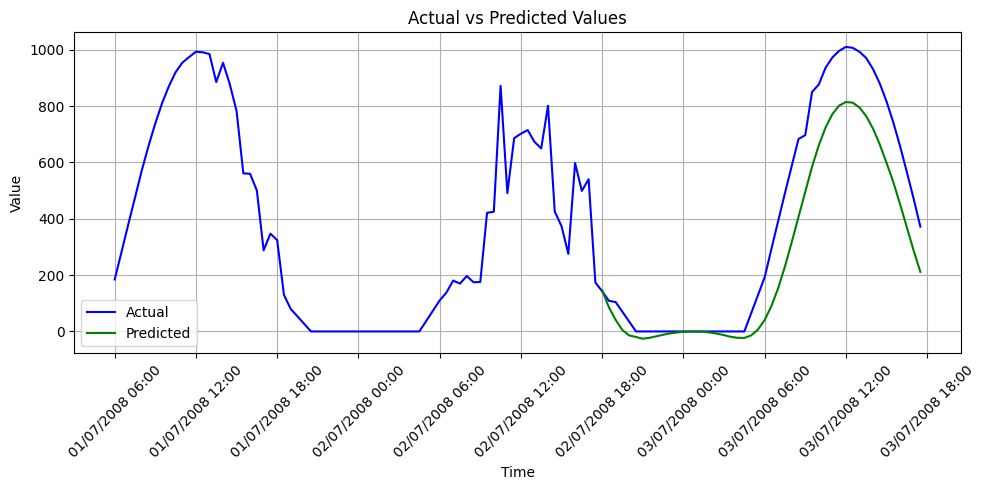

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


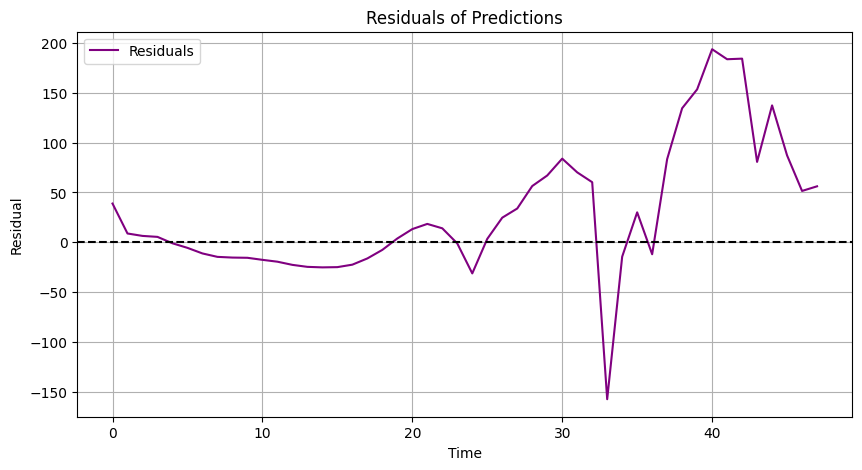

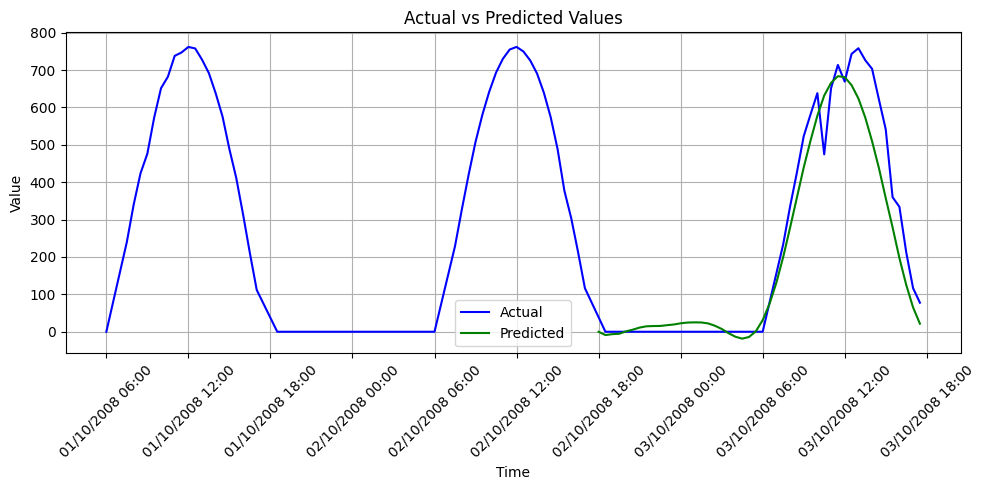

Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look96_overlap1_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look96_overlap1_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


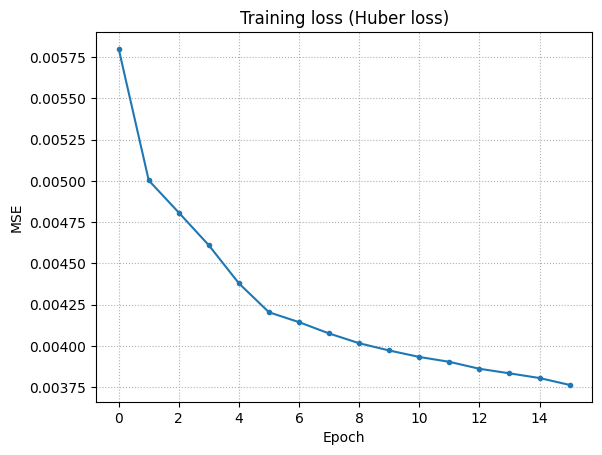

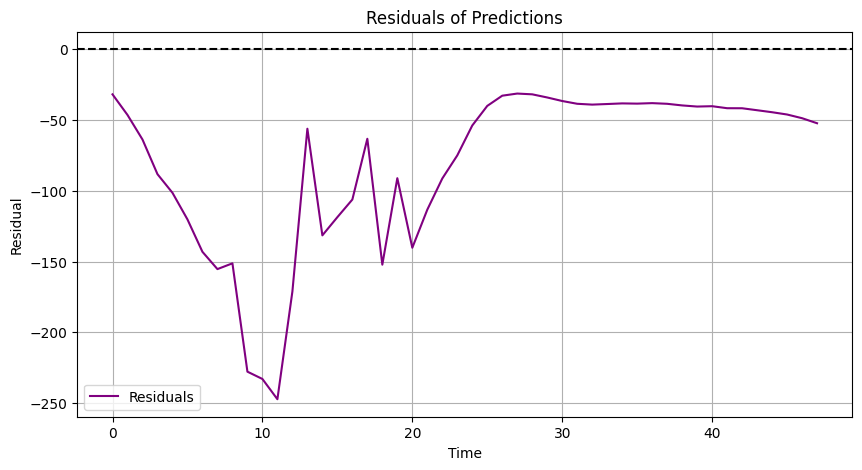

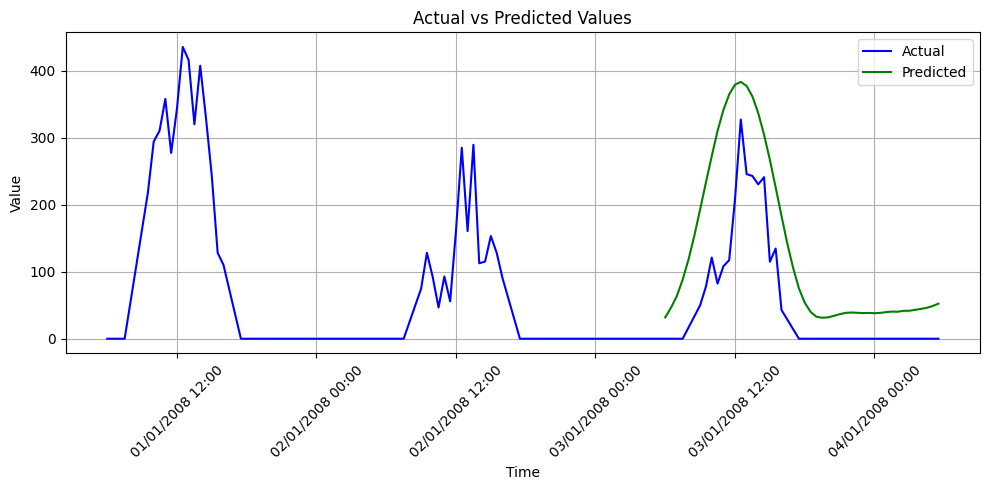

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


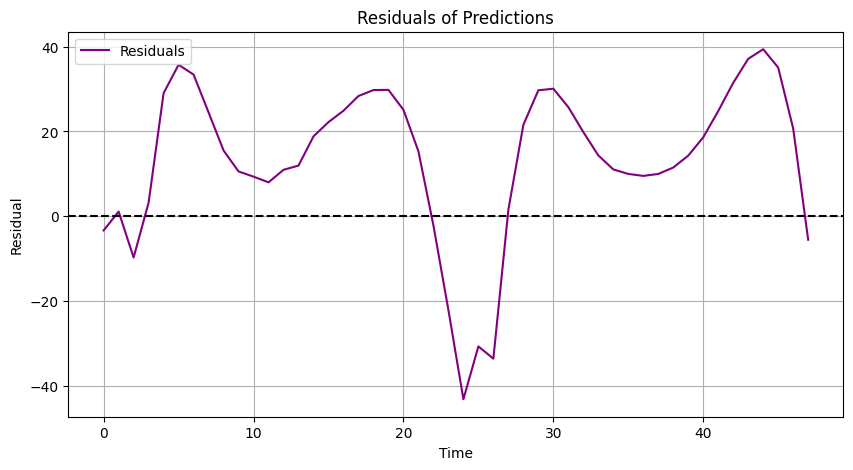

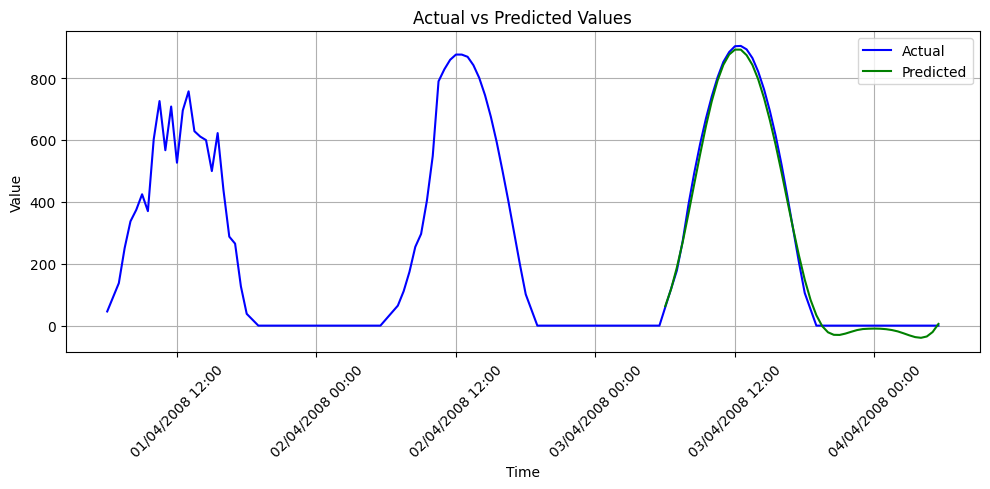

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


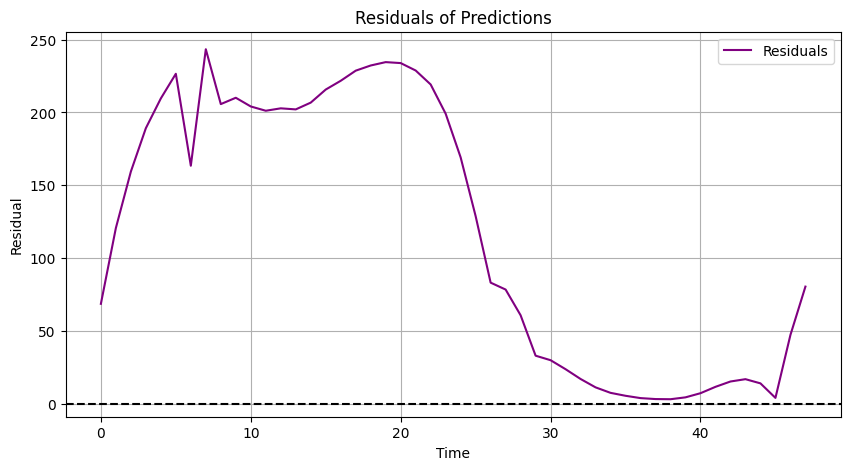

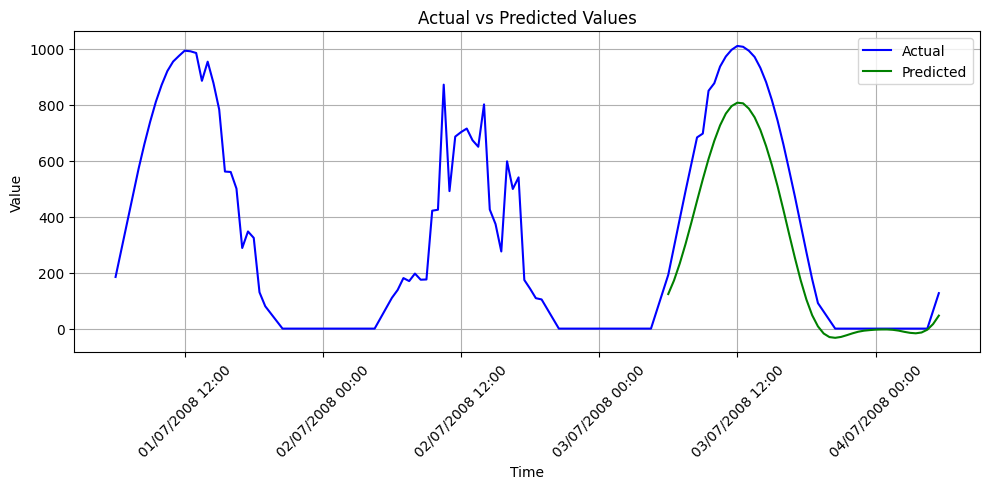

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


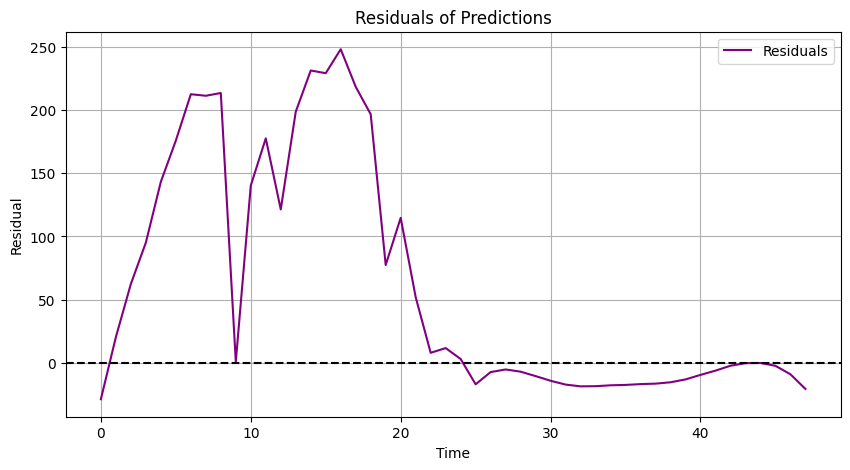

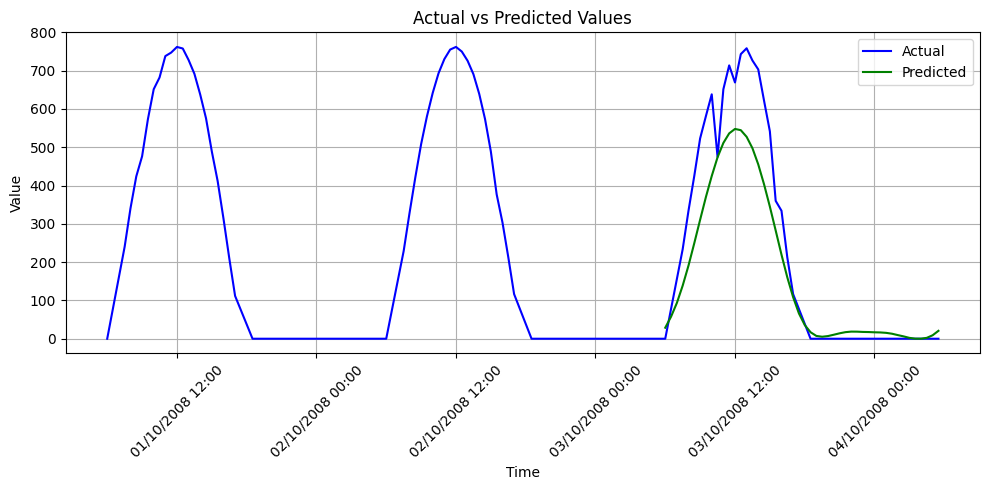

Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look48_overlap24_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look48_overlap24_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step


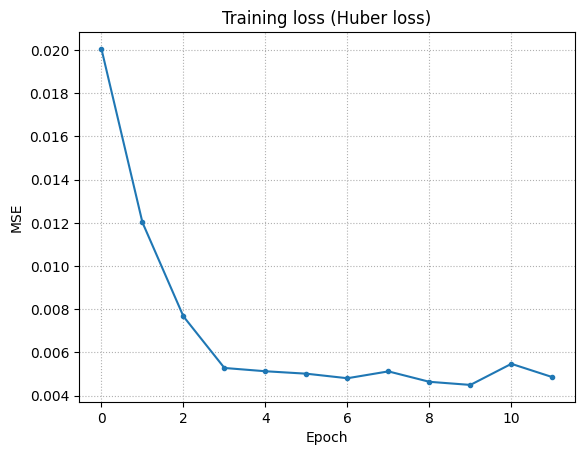

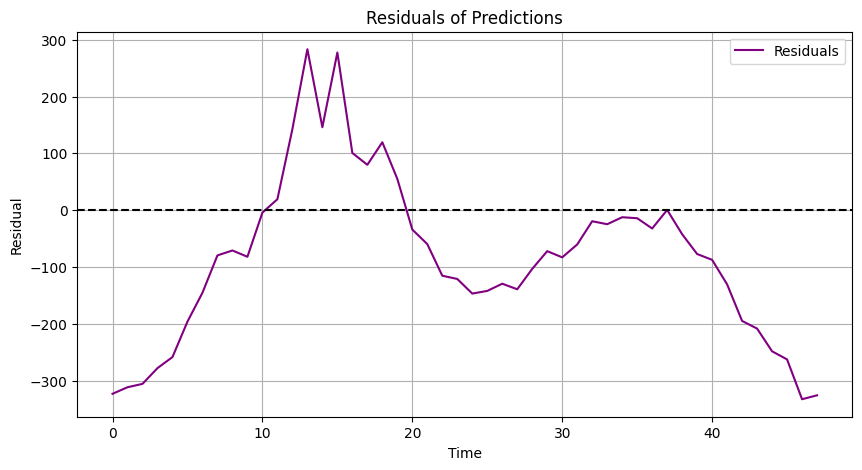

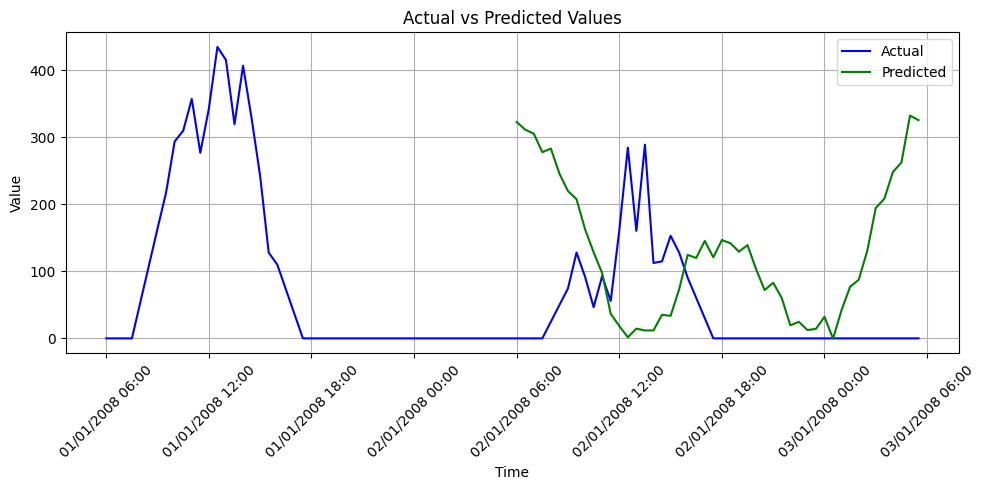

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


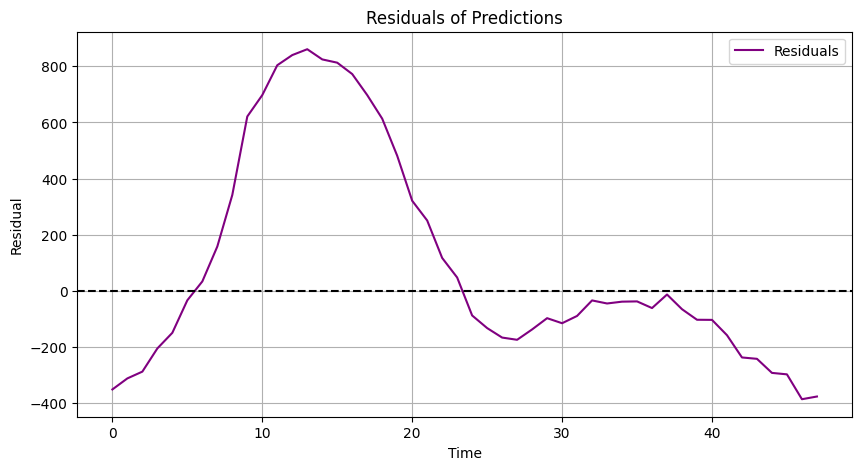

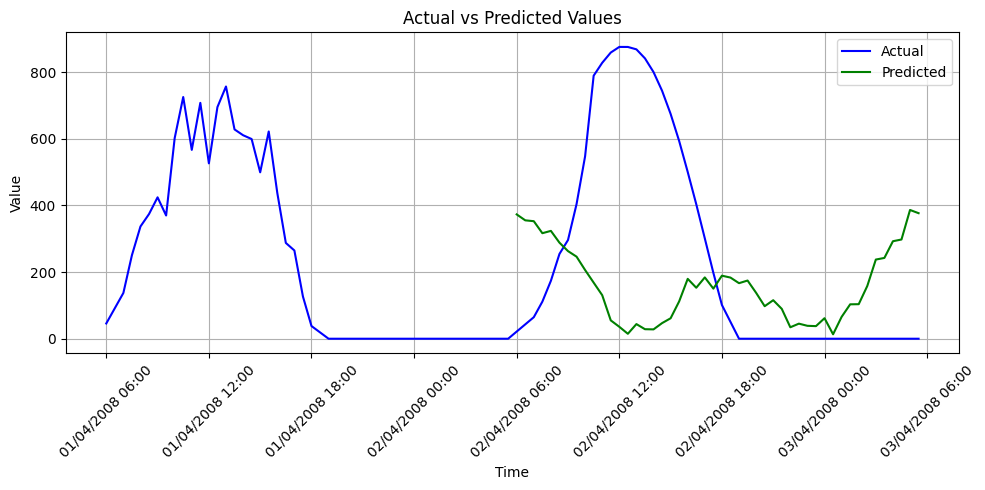

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


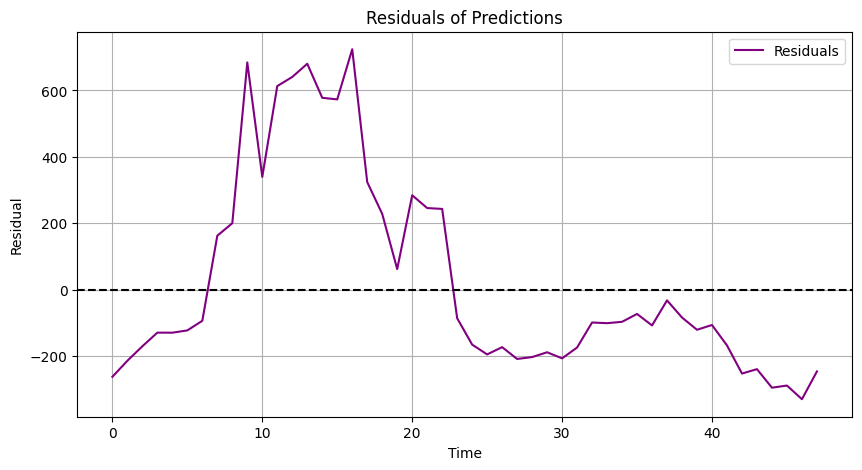

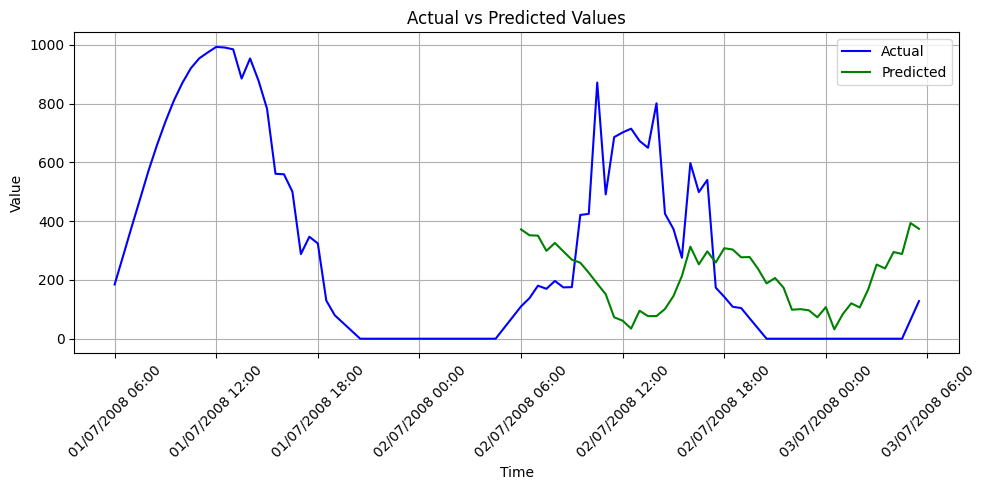

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


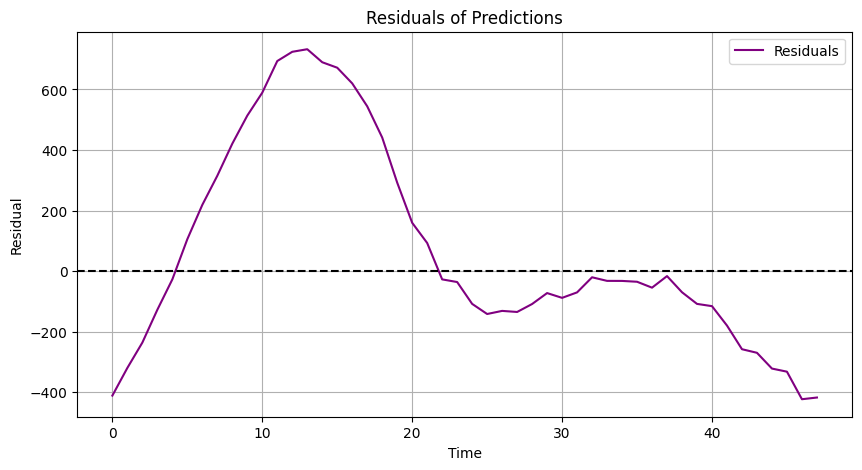

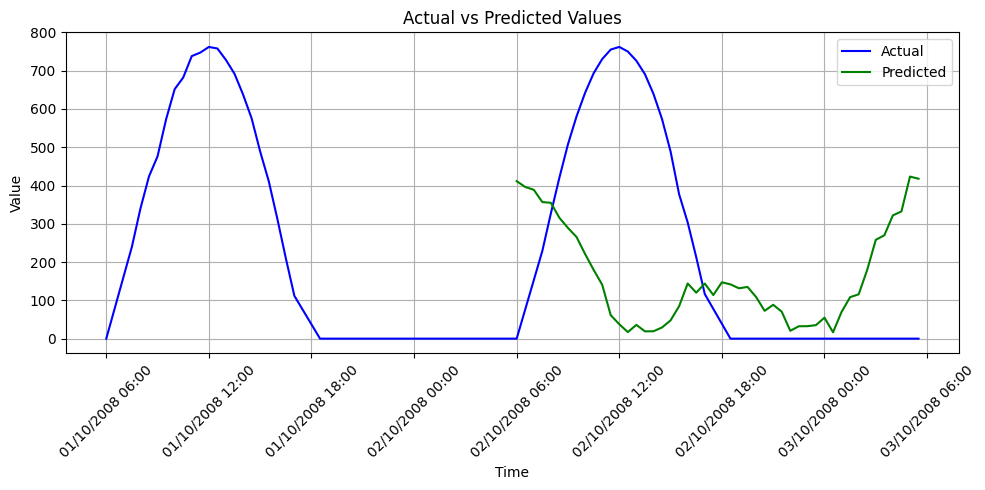

Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look72_overlap36_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look72_overlap36_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step


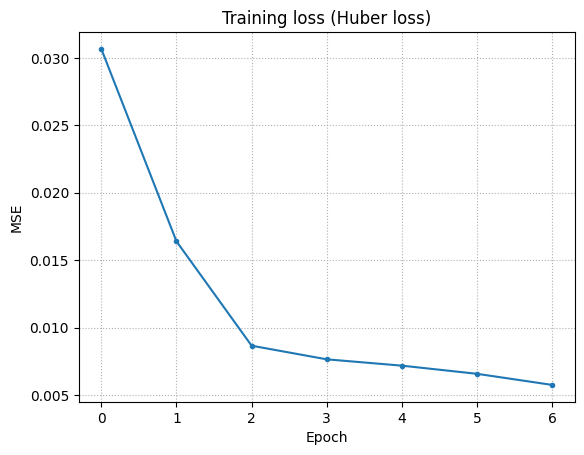

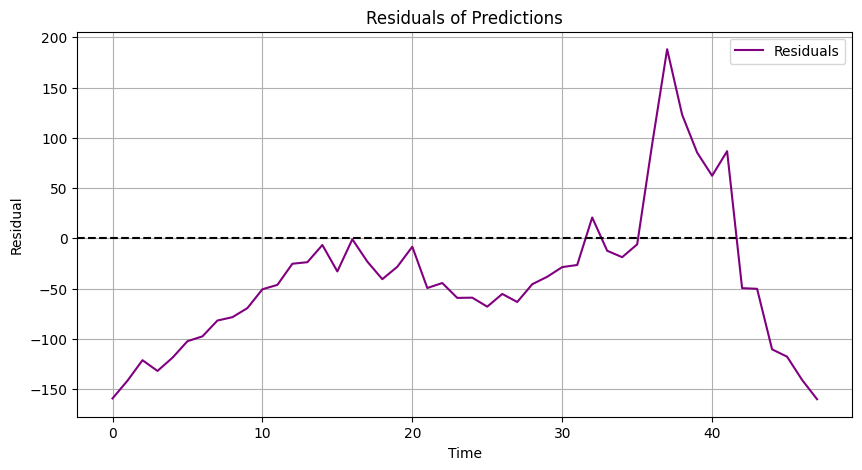

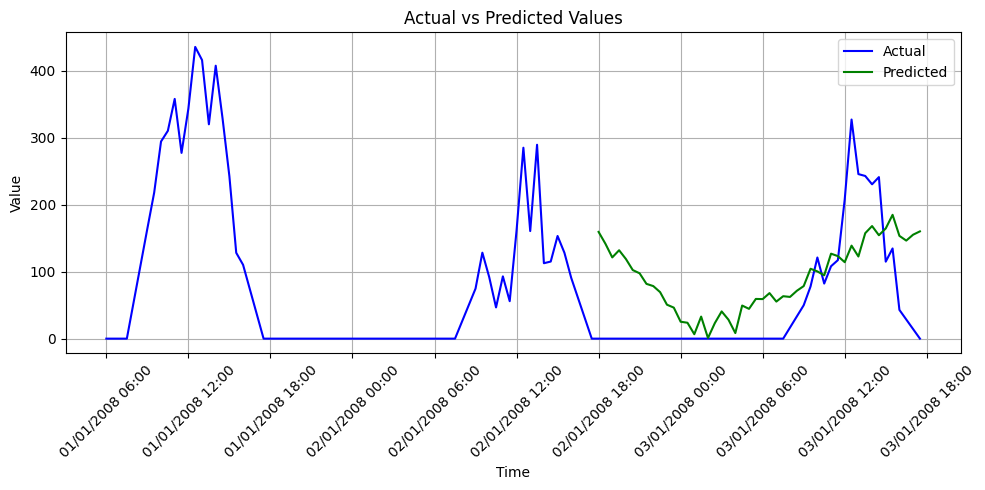

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


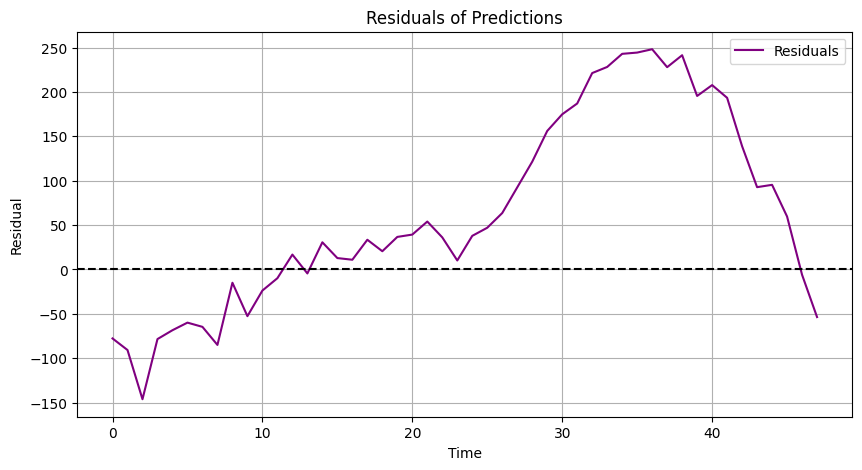

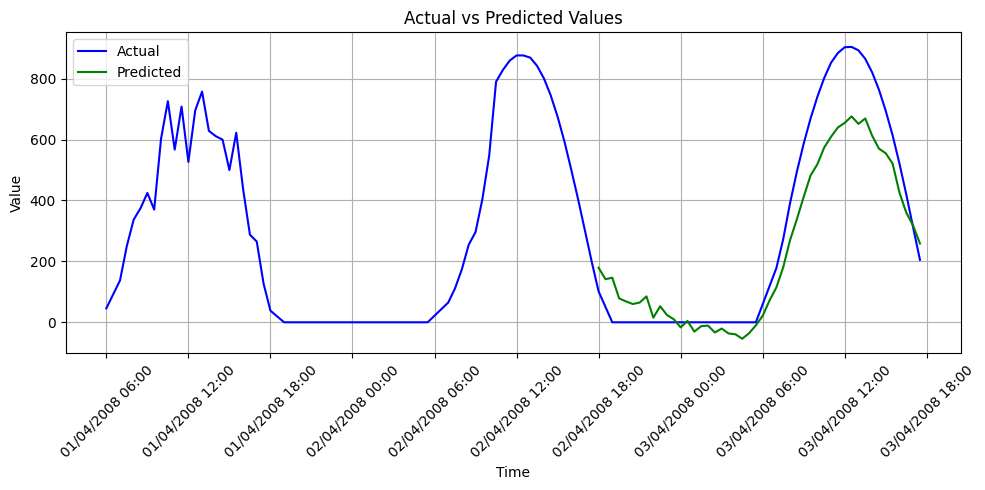

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


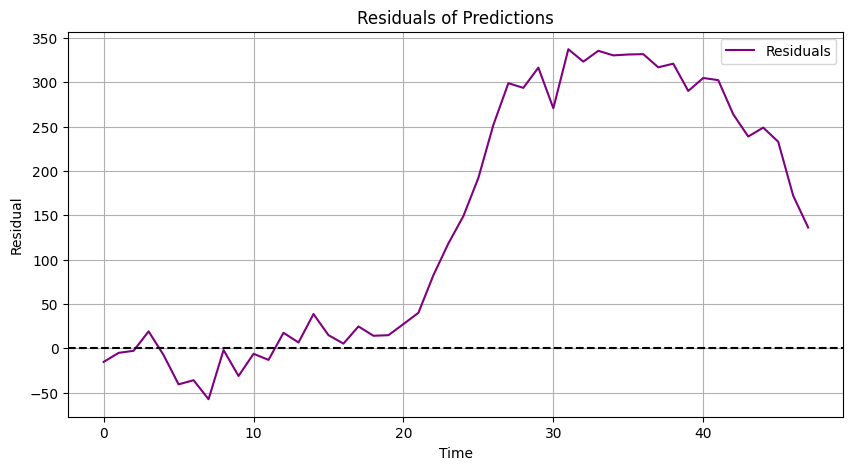

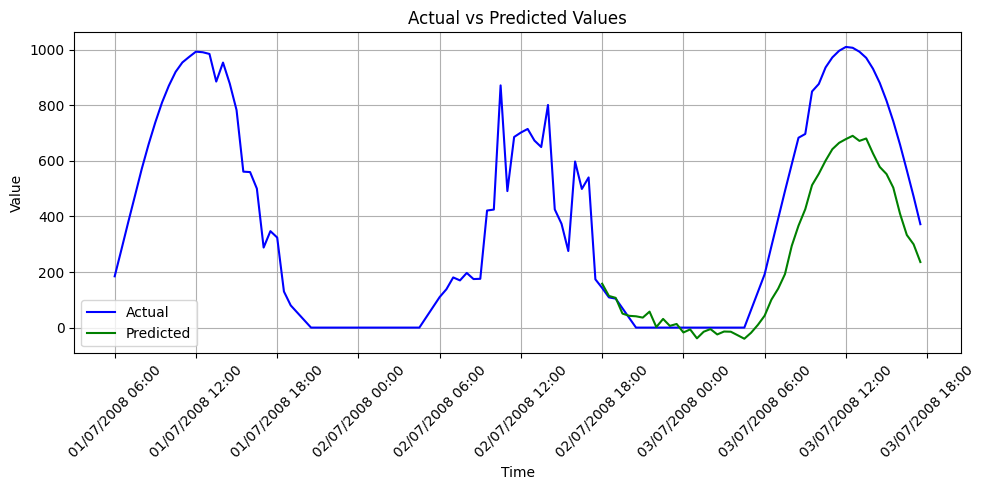

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


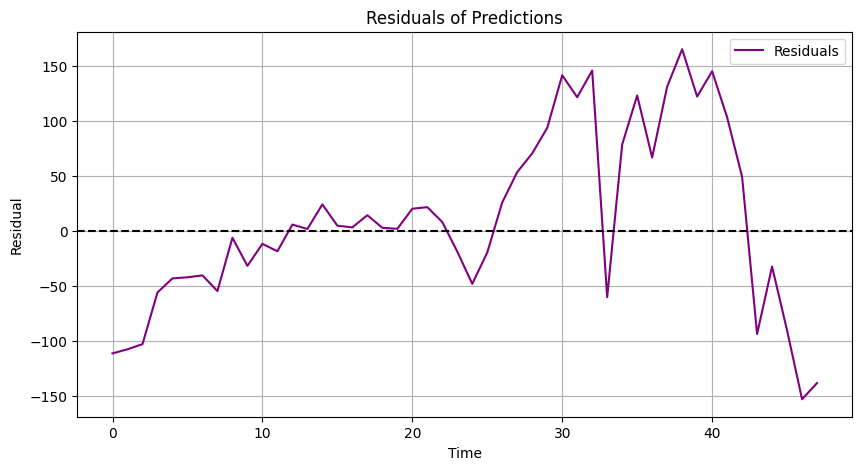

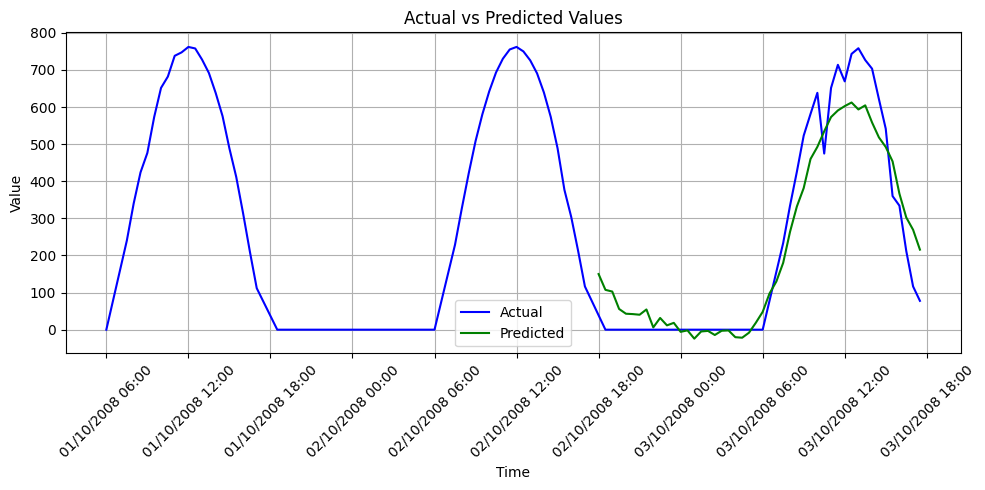

Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look96_overlap48_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look96_overlap48_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step


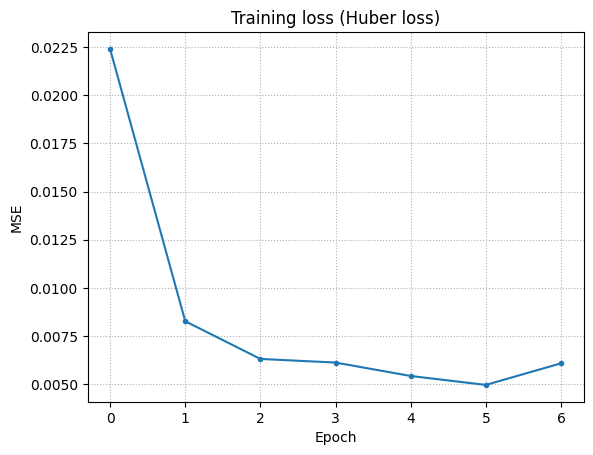

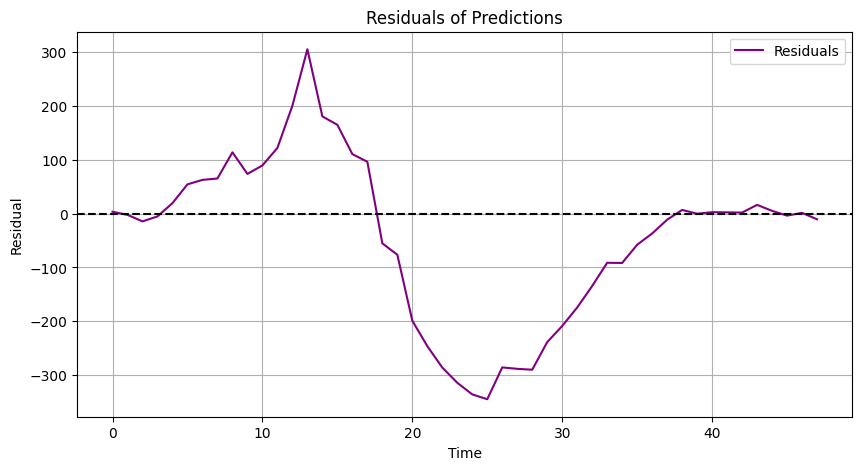

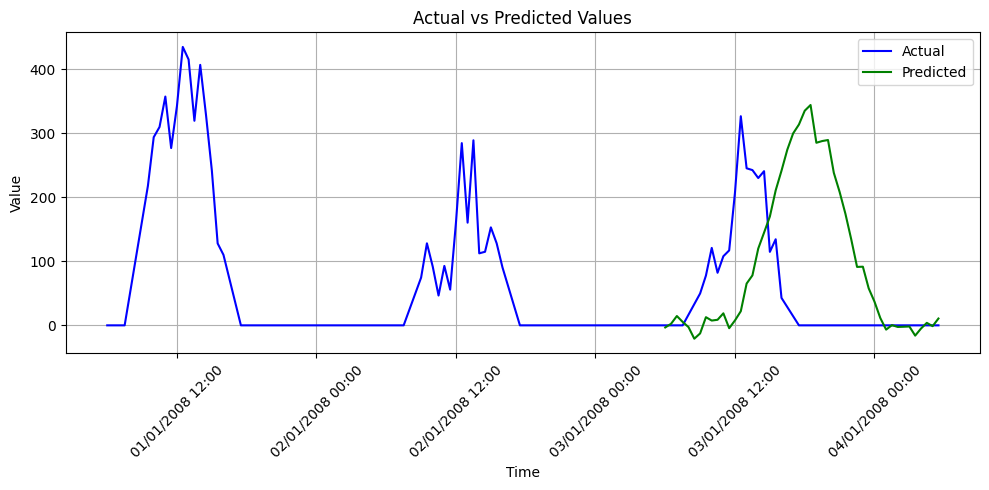

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


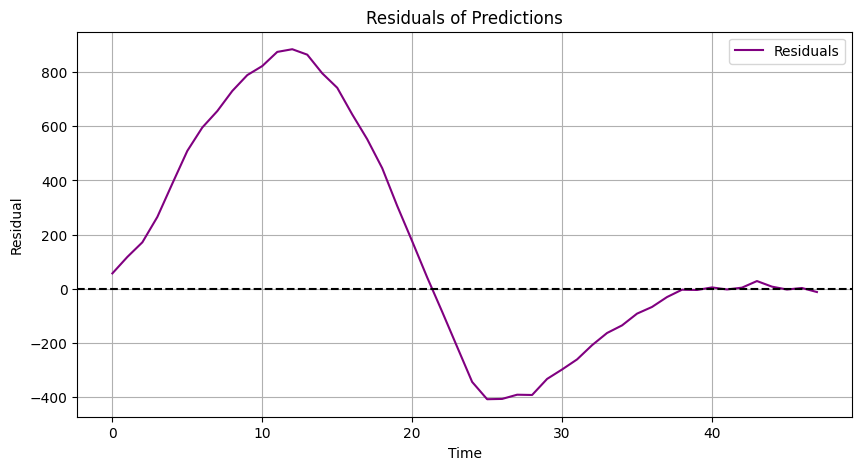

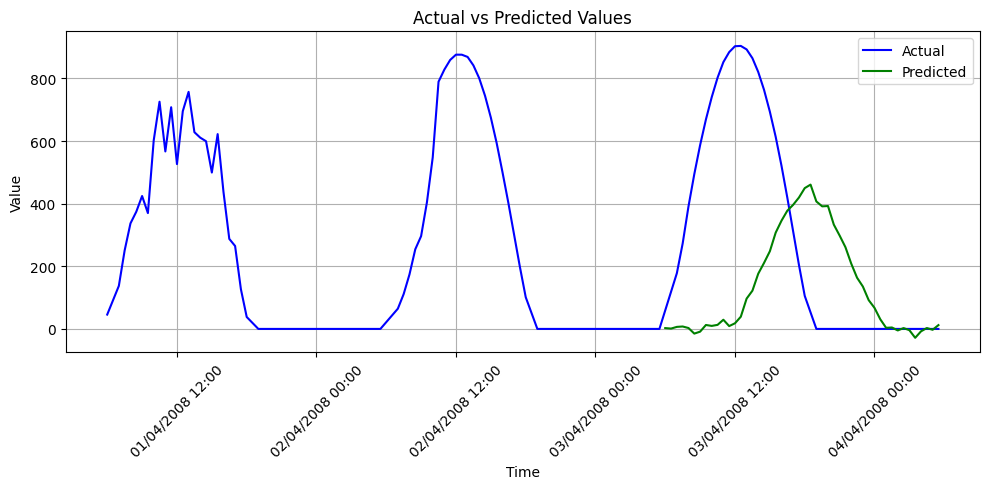

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


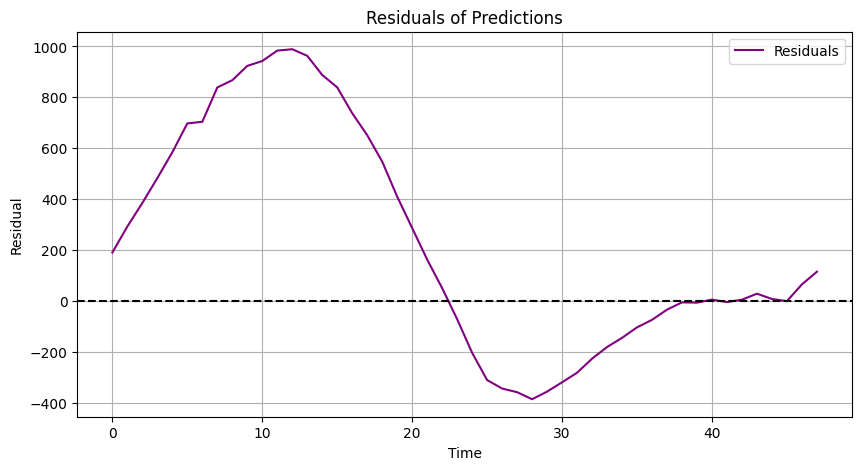

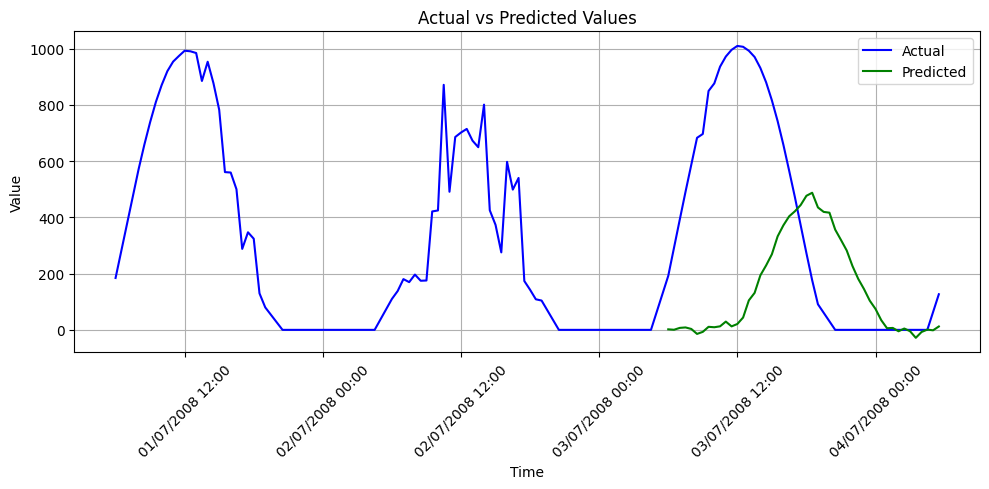

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


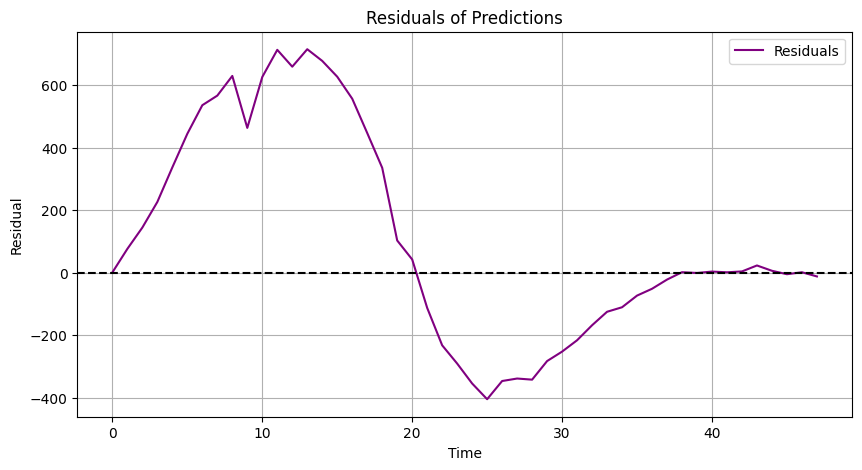

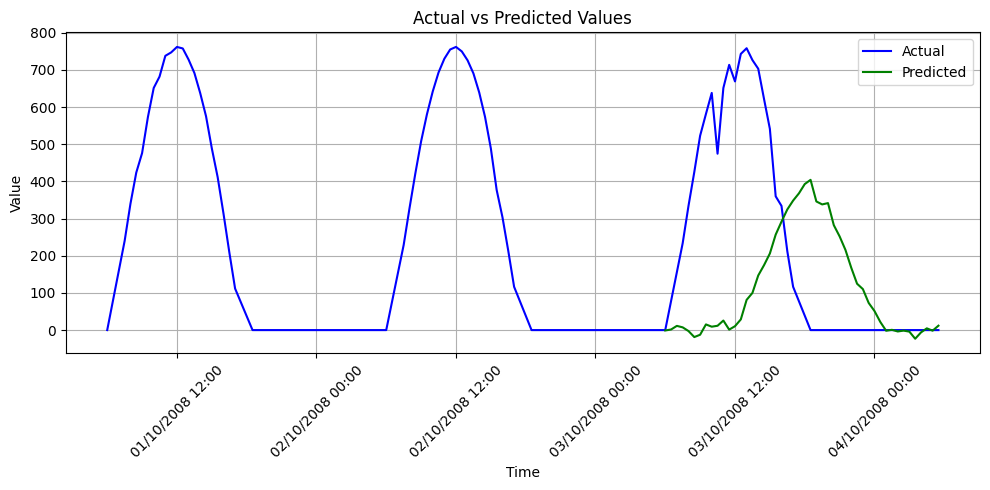

Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look48_overlap48_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look48_overlap48_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step


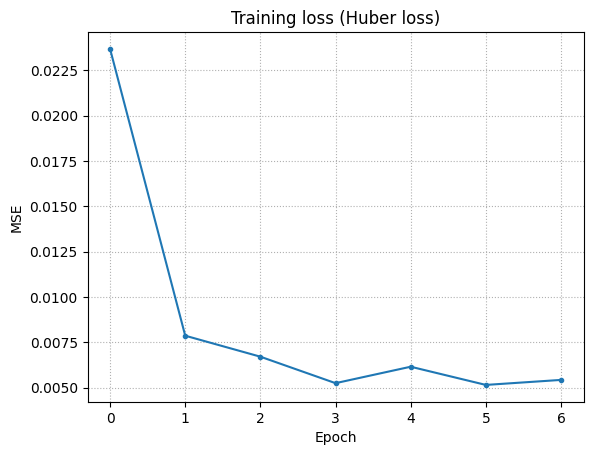

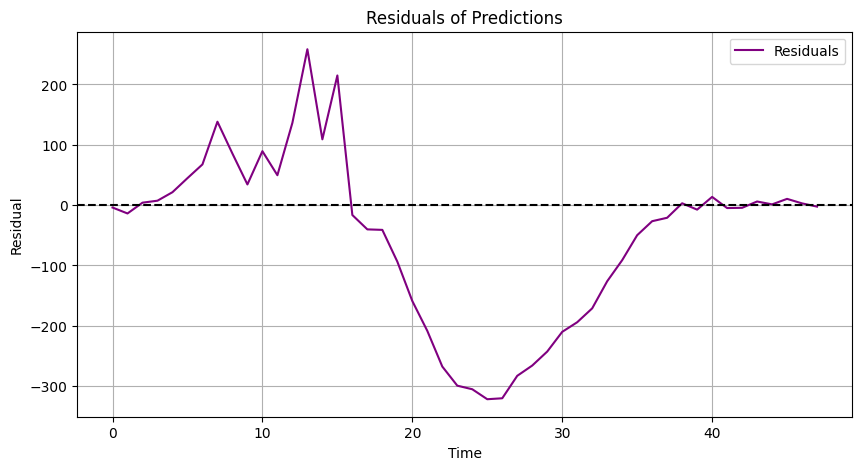

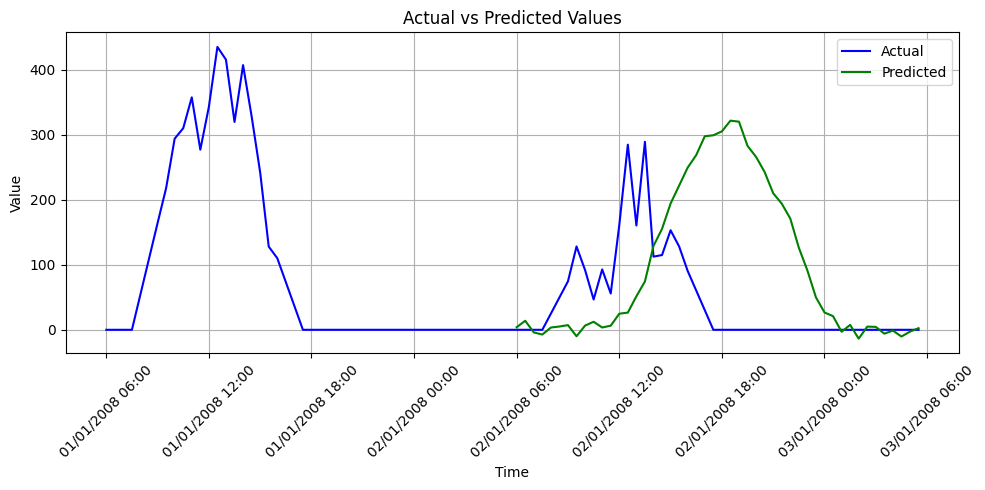

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


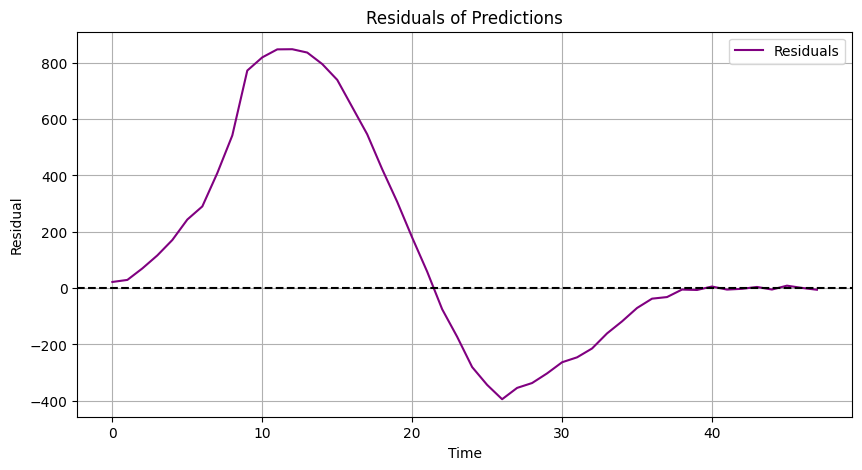

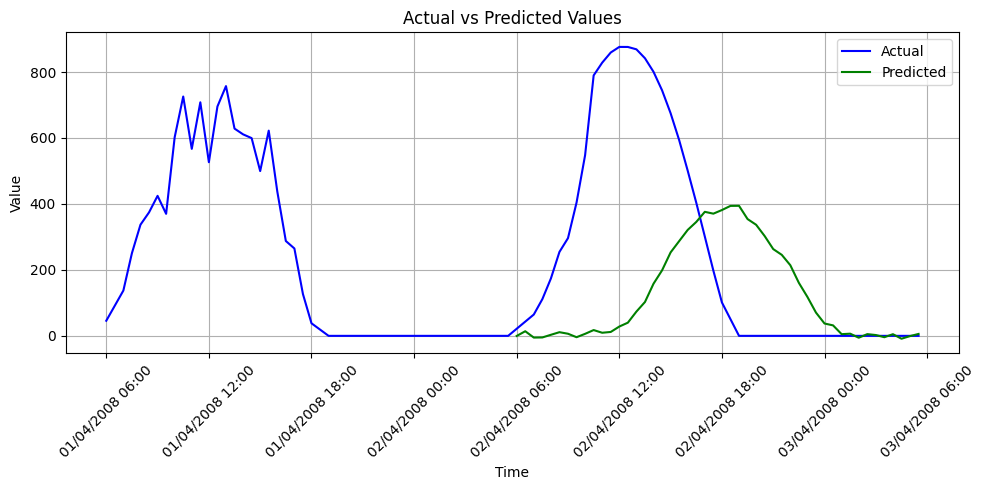

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


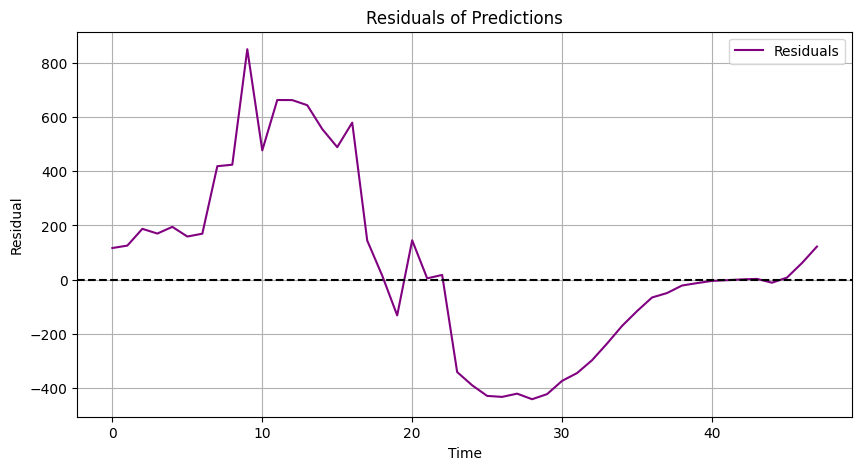

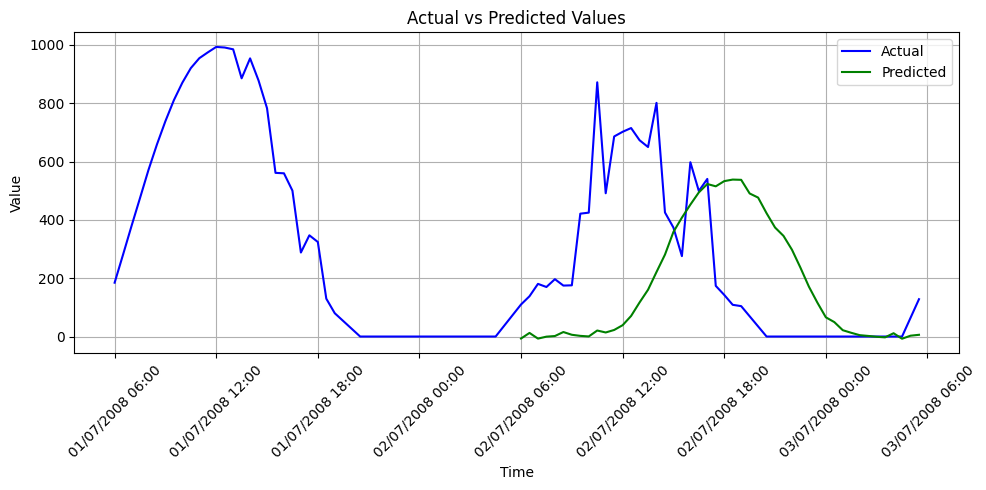

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


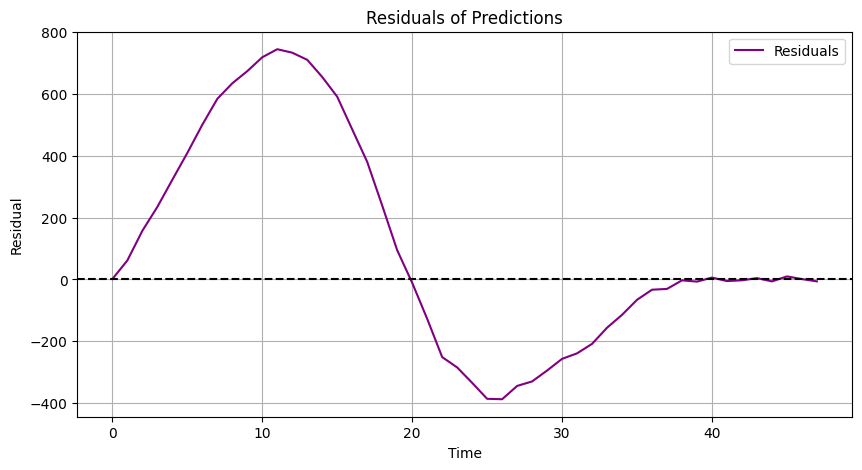

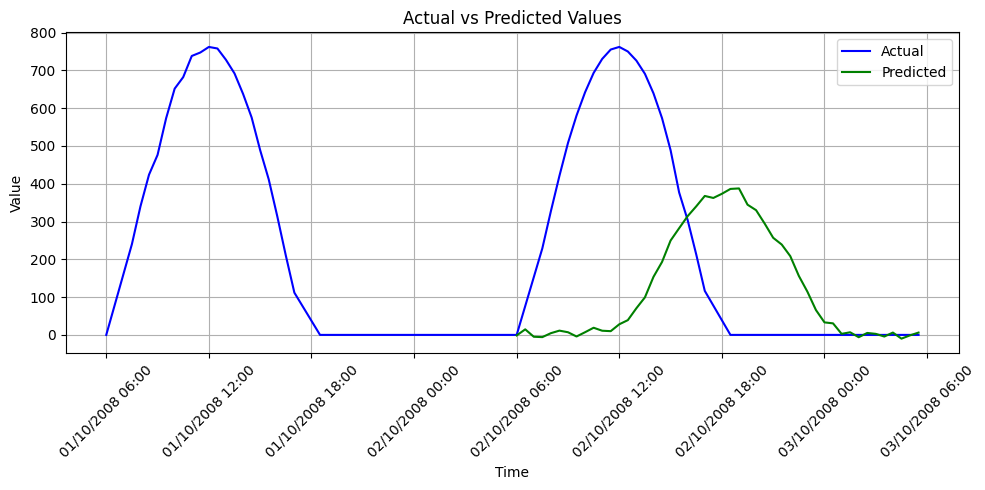

Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look72_overlap72_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look72_overlap72_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step


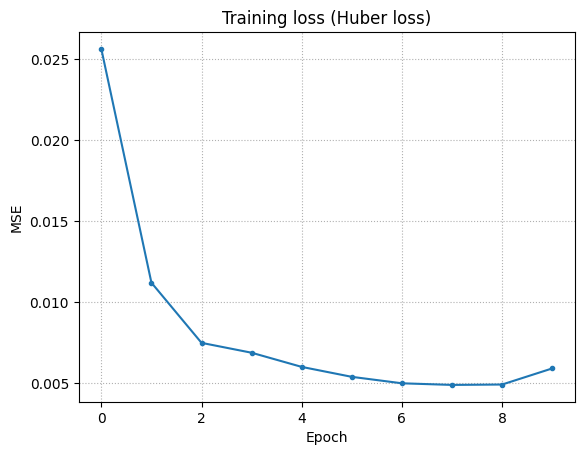

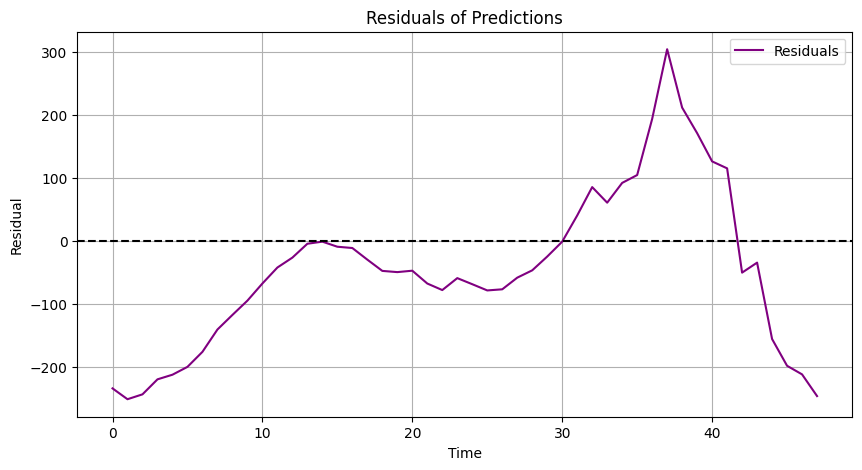

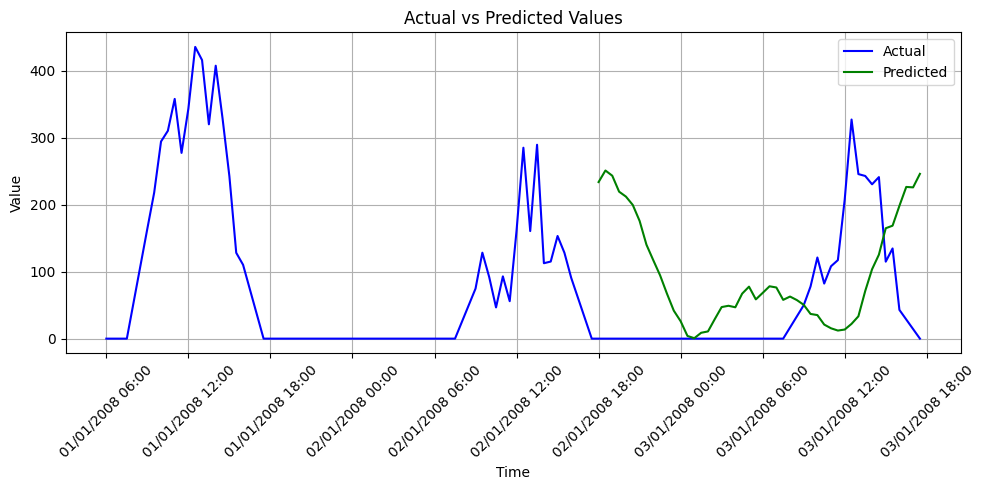

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


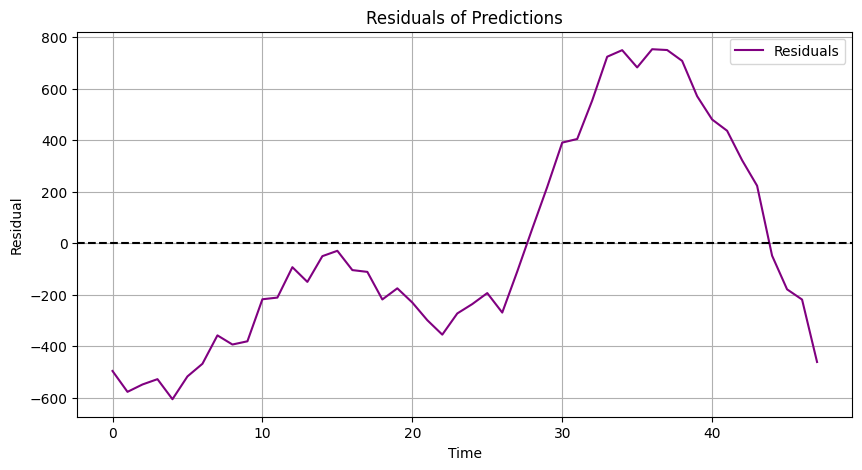

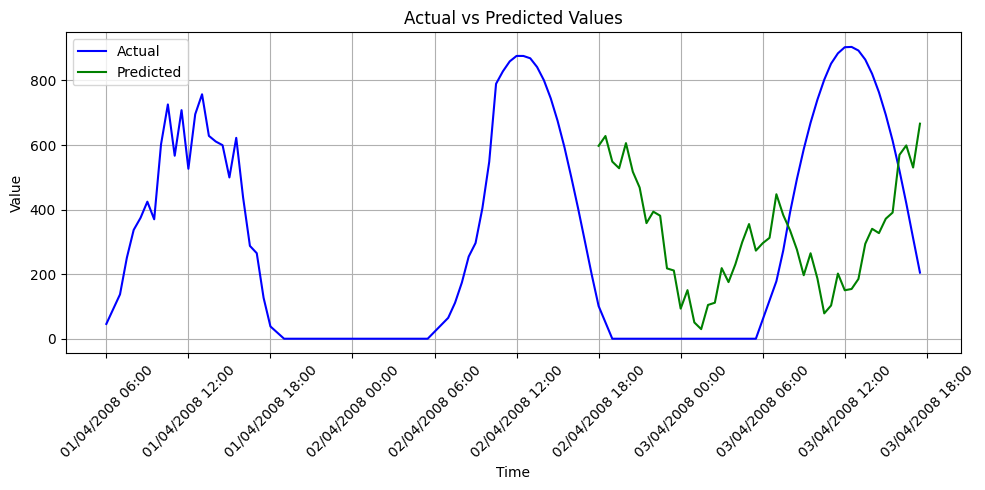

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


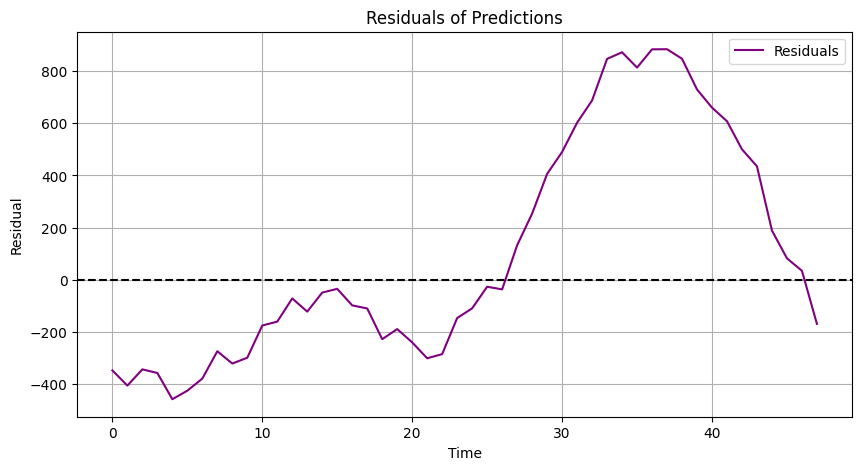

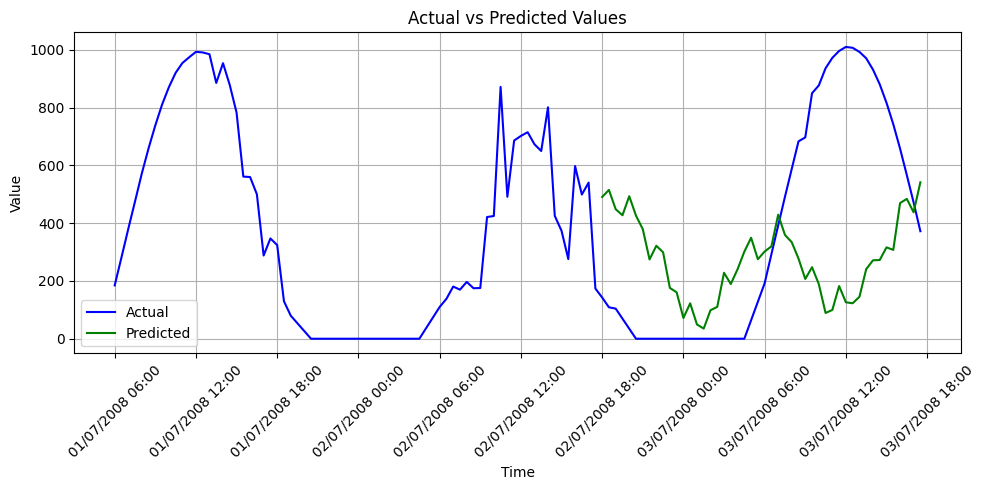

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


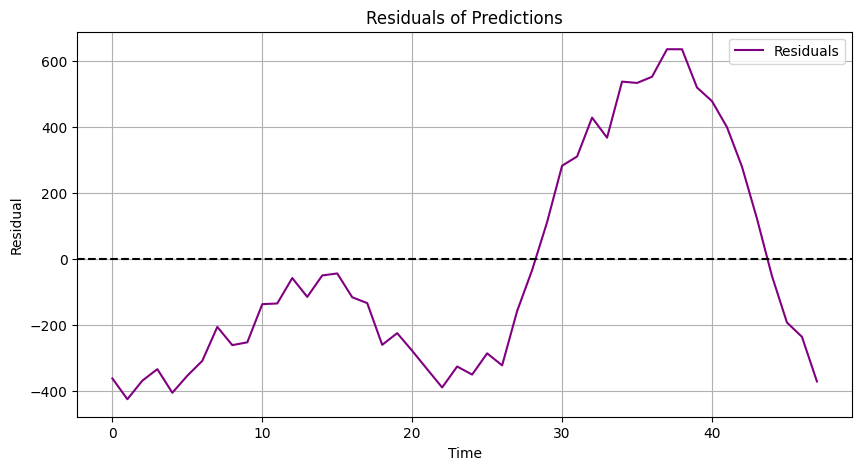

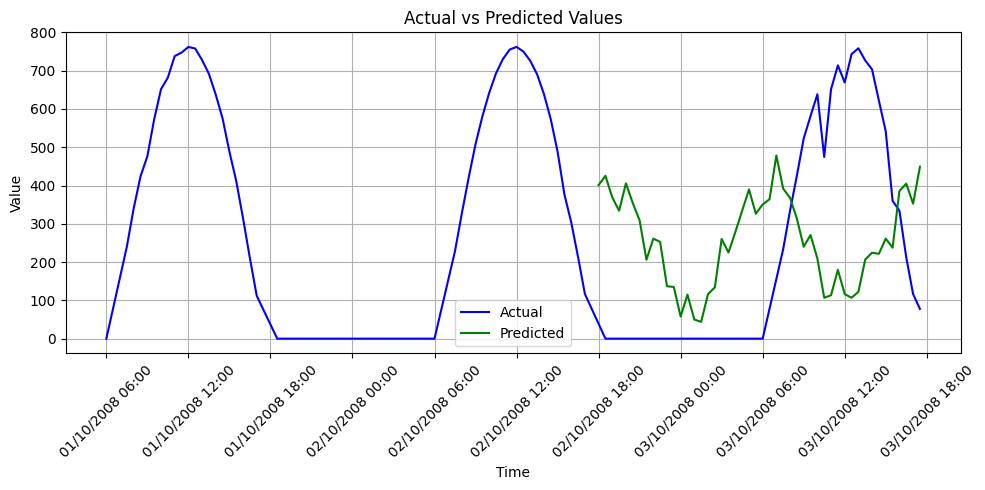

Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look96_overlap96_scaler_x.pkl
Scaler loaded using joblib from /kaggle/working/models/LSTM_1_look96_overlap96_scaler_y.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


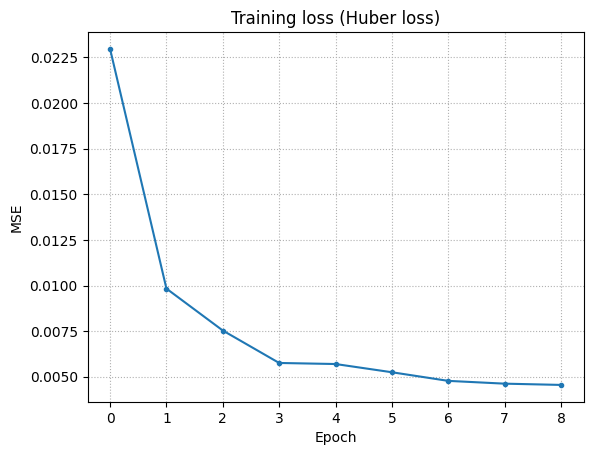

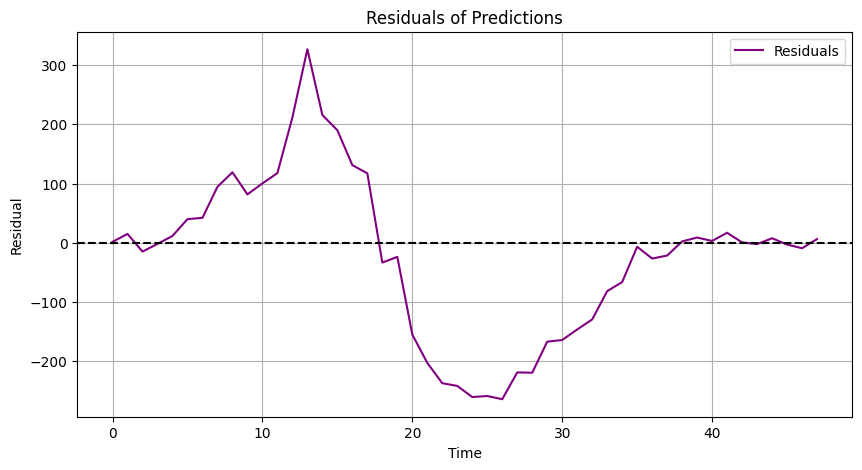

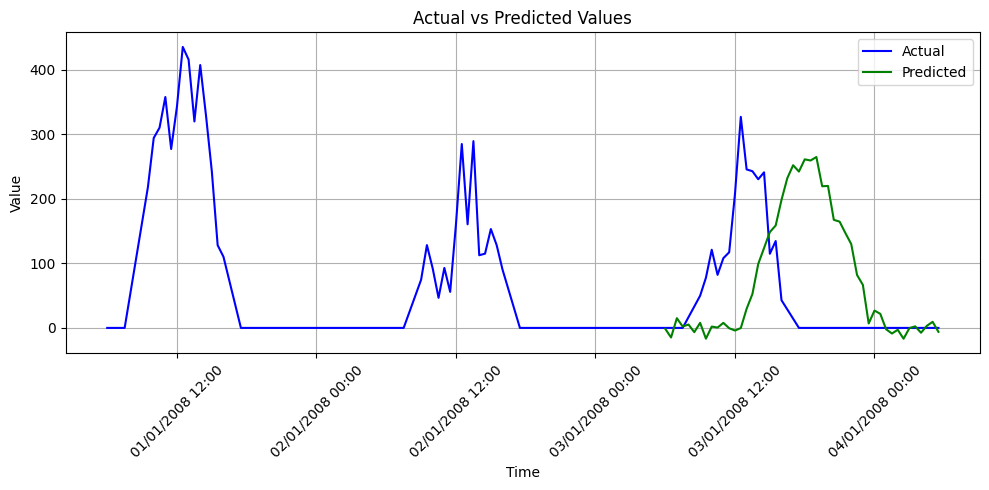

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


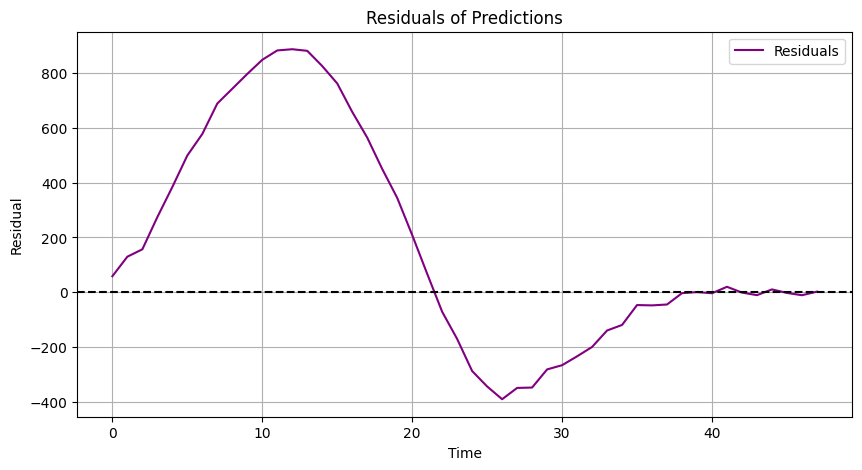

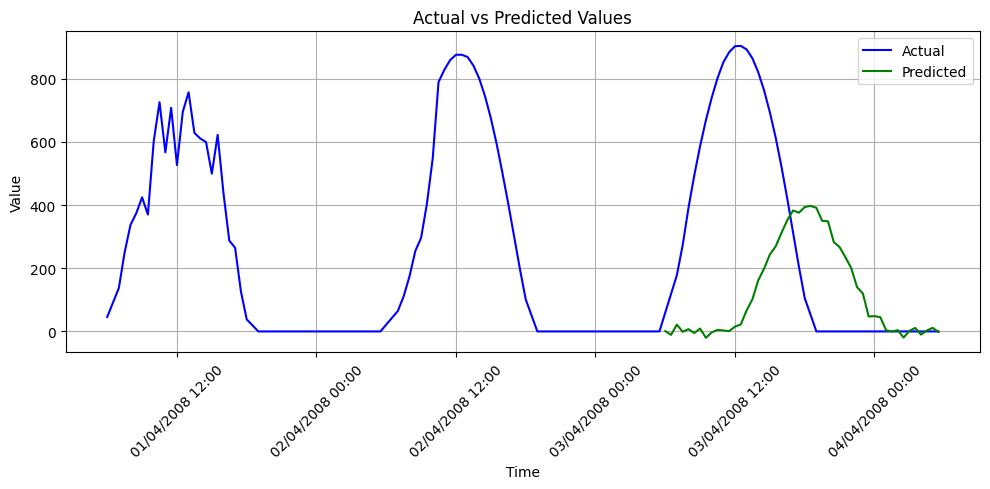

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


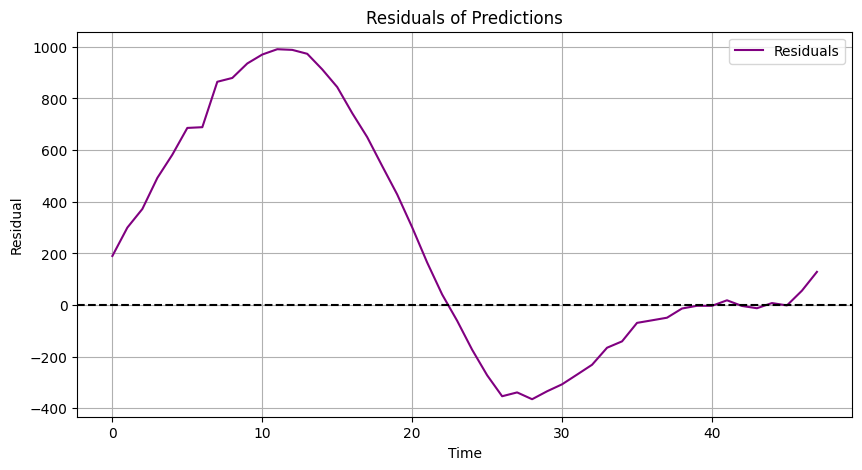

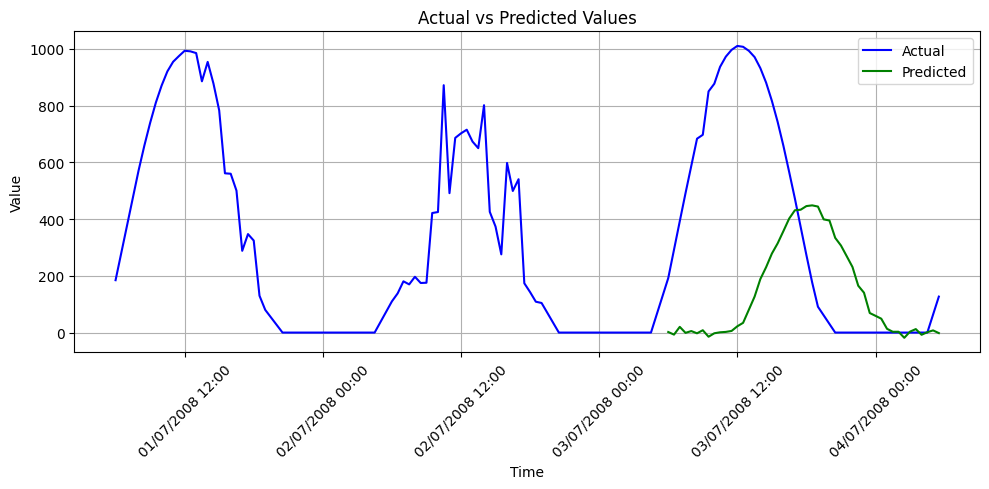

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


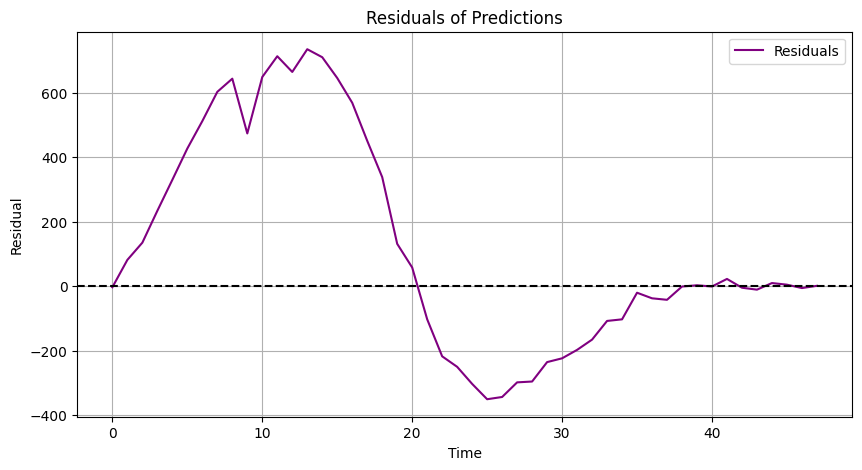

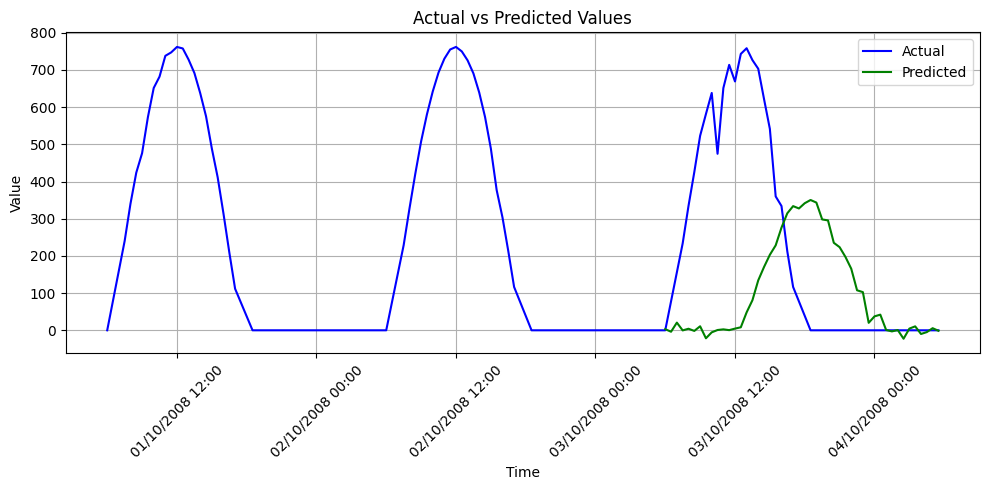

In [7]:
data_for_eval = DataSelectionForEvaluator(dataset)
time_stamps = ['2008-01-01 06:00:00', '2008-04-01 06:00:00', '2008-07-01 06:00:00', '2008-10-01 06:00:00']
for model_conf in model_configurations:
    model = env_dir_options.load_model(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}.keras'))
    history = json.load(open(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_history.json')))
    scaler_x = load_scaler(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_scaler_x.pkl'))
    scaler_y = load_scaler(os.path.join(model_save_dir, f'{model_conf["model"]["name"]}_scaler_y.pkl'))

    # Evaluation of the model in different timestamps

    for iter, time_stamp in enumerate(time_stamps):
        y_true, y_pred, extended_y_true = data_for_eval.data_selection(model_=model,
                                                                       time_stamp=time_stamp,
                                                                       num_look_back_steps=model_conf["model"]["training"][
                                                                           "n_past_steps"],
                                                                       num_forecast_steps=model_conf["model"]["training"][
                                                                           "n_forecast_steps"],
                                                                       columns_for_training=
                                                                       model_conf["model"]["training"][
                                                                           "columns_for_training"],
                                                                       scaler_x=scaler_x,
                                                                       scaler_y=scaler_y,
                                                                       date_index="timestamp",
                                                                       target_column="GHI")
    
        evaluator = ModelEvaluator(y_true, y_pred)
        if iter == 0:
            evaluator.plot_loss(history, 'Huber loss')
        evaluator.plot_residuals()
        evaluator.plot_actual_vs_predicted(extended_y_true, model_conf["model"]["training"]["n_past_steps"])

In [11]:
!zip -r models.zip models

  adding: models/ (stored 0%)
  adding: models/LSTM_1_look96_overlap1_history.json (deflated 63%)
  adding: models/LSTM_1_look72_overlap36_history.json (deflated 59%)
  adding: models/LSTM_1_look48_overlap1_history.json (deflated 62%)
  adding: models/LSTM_1_look96_overlap1_scaler_y.pkl (deflated 44%)
  adding: models/LSTM_1_look72_overlap36_scaler_y.pkl (deflated 44%)
  adding: models/LSTM_1_look72_overlap1_scaler_y.pkl (deflated 44%)
  adding: models/LSTM_1_look72_overlap72_scaler_y.pkl (deflated 44%)
  adding: models/LSTM_1_look48_overlap1_scaler_x.pkl (deflated 39%)
  adding: models/LSTM_1_look96_overlap48_scaler_y.pkl (deflated 44%)
  adding: models/LSTM_1_look96_overlap1_scaler_x.pkl (deflated 39%)
  adding: models/LSTM_1_look72_overlap72.keras (deflated 8%)
  adding: models/LSTM_1_look96_overlap96_scaler_x.pkl (deflated 39%)
  adding: models/LSTM_1_look72_overlap1.keras (deflated 22%)
  adding: models/LSTM_1_look72_overlap36_scaler_x.pkl (deflated 39%)
  adding: models/LSTM_1_lo